### **Data Source**

1. **Data Source**:
   - The dataset was sourced from the **CRSP/Compustat Merged Database** via **Wharton Research Data Services (WRDS)**.
   - This database integrates security price, return, and volume data from the NYSE, AMEX, and NASDAQ stock markets, along with fundamental data from Compustat.

2. **Place**:
   - The data covers securities listed on major US stock exchanges, including **NYSE**, **NASDAQ**, and **AMEX**.
   - These exchanges are headquartered in the United States.

3. **Duration**:
   - The dataset spans from **January 2010 to December 2024**.
   - The timeframe ensures the inclusion of historical and recent data to capture long-term trends and recent market dynamics.

## **0. Data Loading and EDA**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
file_path = 'lb70xenpbakskzv9.csv'
data = pd.read_csv(file_path)

In [23]:
print("Dataset Head:")
print(data.head())

Dataset Head:
   GVKEY LINKPRIM  LIID LINKTYPE  LPERMNO  LPERMCO      LINKDT LINKENDDT  iid  \
0   1690        P     1       LU    14593        7  1980-12-12         E    1   
1   1690        P     1       LU    14593        7  1980-12-12         E    1   
2   1690        P     1       LU    14593        7  1980-12-12         E    1   
3   1690        P     1       LU    14593        7  1980-12-12         E    1   
4   1690        P     1       LU    14593        7  1980-12-12         E    1   

     datadate  ...     cusip       conm      cshoc      cshtrd   prccd  \
0  2010-01-04  ...  37833100  APPLE INC  905349000  17540960.0  214.01   
1  2010-01-05  ...  37833100  APPLE INC  905349000  21474930.0  214.38   
2  2010-01-06  ...  37833100  APPLE INC  905349000  19642030.0  210.97   
3  2010-01-07  ...  37833100  APPLE INC  905349000  17013540.0  210.58   
4  2010-01-08  ...  37833100  APPLE INC  905349000  15972090.0  211.98   

    prchd   prcld   prcod      trfd    ccmbegdt  
0  2

### Column Descriptions

#### **Identification and Metadata Columns**
- **GVKEY**: 
  - A unique identifier assigned to each company by CRSP.
  - Used to track a specific company across time and link with other datasets.

- **LINKPRIM**: 
  - Indicates the primary link for the security in the CRSP-Compustat dataset. 
  - Value `P` suggests it's the primary security of the company.

- **LIID**: 
  - A unique identifier for the security at the link level.
  - Helps distinguish between multiple securities issued by the same company.

- **LINKTYPE**: 
  - Type of link between CRSP and Compustat.
  - `LU` indicates a permanent link used for active securities.

- **LPERMNO**: 
  - A unique identifier for each security in CRSP's database.
  - Essential for tracking individual securities across time.

- **LPERMCO**: 
  - Identifies the company-level entity associated with the security. 
  - Used for grouping securities by parent companies.

- **LINKDT** and **LINKENDDT**: 
  - Start and end dates for the security's validity in the dataset.
  - Useful to ensure the analysis is performed only during valid periods.

- **iid**: 
  - Instrument identifier, likely specific to dividends or security classification.

- **datadate**: 
  - Date of the data point for the record.
  - Acts as the time index for the dataset.

#### **Security Details**
- **tic**: 
  - Ticker symbol for the company.
  - Short identifier used in financial markets to track stocks (e.g., AAPL for Apple).

- **cusip**: 
  - Unique identifier assigned to the security by CUSIP Services.
  - Helps in linking with other datasets or identifying the exact issue.

- **conm**: 
  - Company name (e.g., APPLE INC).
  - Directly identifies the company for interpretation.

#### **Financial Characteristics**
- **cshoc** (Shares Outstanding): 
  - The total number of shares available for trading.
  - Useful for calculating market capitalization and share-based metrics.

- **cshtrd** (Trading Volume): 
  - Total number of shares traded on the given day.
  - Indicates liquidity and investor activity.

- **prccd** (Price - Close): 
  - The closing price of the stock on the given day.
  - Reflects the market valuation of the security at the close of trading.

- **prchd** (Price - High): 
  - The highest price the stock reached during the trading day.
  - Useful for volatility and intraday trading analysis.

- **prcld** (Price - Low): 
  - The lowest price the stock reached during the trading day.
  - Often compared with the high price to understand the day’s range.

- **prcod** (Price - Open): 
  - The opening price of the stock on the trading day.
  - Indicates where the trading began, relative to the previous close.

- **trfd** (Total Return Factor): 
  - A factor representing total returns, including dividends and splits.
  - Used to calculate adjusted prices and returns over time.

#### **Company Date**
- **ccmbegdt**: 
  - Beginning date of the company record.
  - Reflects when the entity or security first entered the dataset.

In [24]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GVKEY      3755 non-null   int64  
 1   LINKPRIM   3755 non-null   object 
 2   LIID       3755 non-null   int64  
 3   LINKTYPE   3755 non-null   object 
 4   LPERMNO    3755 non-null   int64  
 5   LPERMCO    3755 non-null   int64  
 6   LINKDT     3755 non-null   object 
 7   LINKENDDT  3755 non-null   object 
 8   iid        3755 non-null   int64  
 9   datadate   3755 non-null   object 
 10  tic        3755 non-null   object 
 11  cusip      3755 non-null   int64  
 12  conm       3755 non-null   object 
 13  cshoc      3755 non-null   int64  
 14  cshtrd     3755 non-null   float64
 15  prccd      3755 non-null   float64
 16  prchd      3755 non-null   float64
 17  prcld      3755 non-null   float64
 18  prcod      3755 non-null   float64
 19  trfd       3755 non-null   float6

In [25]:
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
        GVKEY    LIID  LPERMNO  LPERMCO     iid       cusip         cshoc  \
count  3755.0  3755.0   3755.0   3755.0  3755.0      3755.0  3.755000e+03   
mean   1690.0     1.0  14593.0      7.0     1.0  37833100.0  7.013992e+09   
std       0.0     0.0      0.0      0.0     0.0         0.0  6.000245e+09   
min    1690.0     1.0  14593.0      7.0     1.0  37833100.0  8.613810e+08   
25%    1690.0     1.0  14593.0      7.0     1.0  37833100.0  9.386490e+08   
50%    1690.0     1.0  14593.0      7.0     1.0  37833100.0  5.165228e+09   
75%    1690.0     1.0  14593.0      7.0     1.0  37833100.0  1.533408e+10   
max    1690.0     1.0  14593.0      7.0     1.0  37833100.0  1.710254e+10   

             cshtrd        prccd        prchd        prcld        prcod  \
count  3.755000e+03  3755.000000  3755.000000  3755.000000  3755.000000   
mean   4.342518e+07   244.966195   247.308285   242.445173   244.926165   
std    3.326549e+07   148.163792   149.570312   146.712088 

**Statistical Summaries**:
   - **Prices (prccd, prchd, prcld, prcod)**:
     - Mean close price (`prccd`) is around $244.97, with a wide range from $90.28 to $702.10.
     - This variation indicates a mix of both stable and volatile periods in the stock’s history.
   - **Volume (`cshtrd`)**:
     - Daily trading volumes vary significantly (5.6M to 330.5M shares), reflecting varying liquidity levels.
   - **Shares Outstanding (`cshoc`)**:
     - High variance in shares outstanding suggests the company has undergone changes like share buybacks, stock splits, or new issues.
   - **Return Factor (`trfd`)**:
     - Small range for `trfd` (~1.09 to 1.29) shows stability in total return adjustments, essential for consistent return calculations.

3. **Unique Identifiers**:
   - Columns like `GVKEY`, `LPERMNO`, `tic`, and `cusip` provide a robust system for linking and differentiating securities and companies.

4. **Date Columns**:
   - `datadate` and `LINKDT` are crucial for filtering and aligning the dataset with the relevant analysis periods.

5. **Trading Insights**:
   - **High and low prices**: These offer insights into daily volatility and intraday trading behavior.
   - **Volume**: Helps assess market interest and liquidity during specific periods.

In [26]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Series([], dtype: int64)


**Non-Missing Data**:
   - There are no missing values across the columns, which simplifies preprocessing. This completeness is beneficial for a smooth analysis.

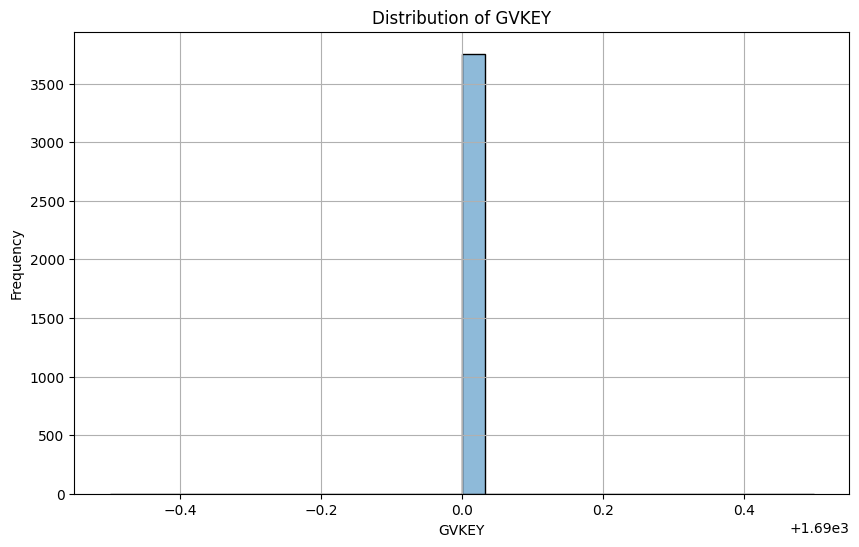

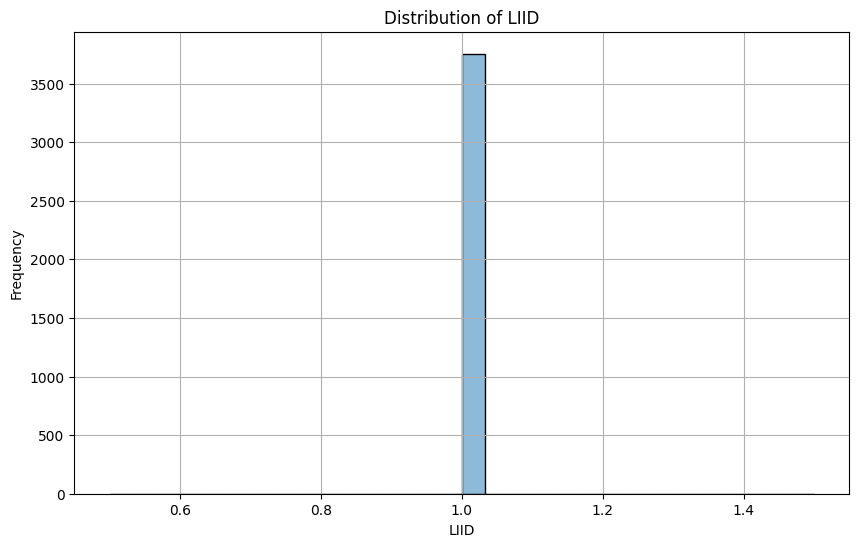

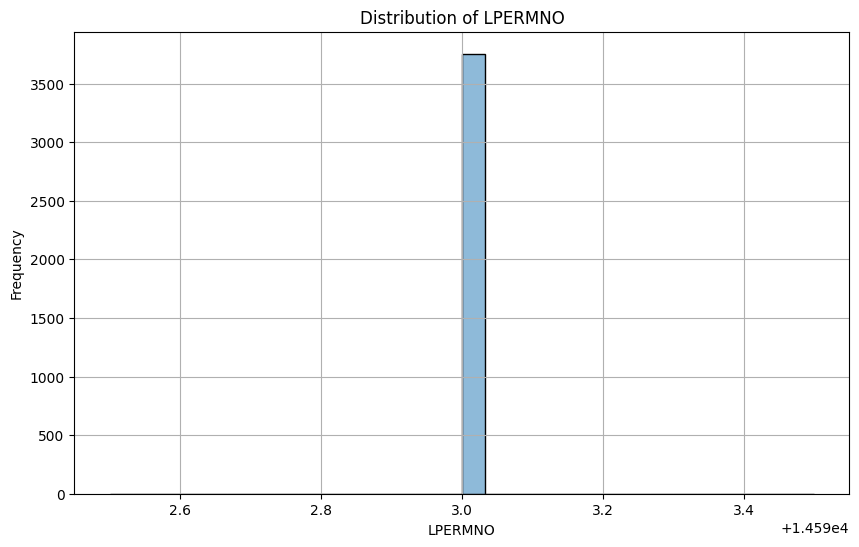

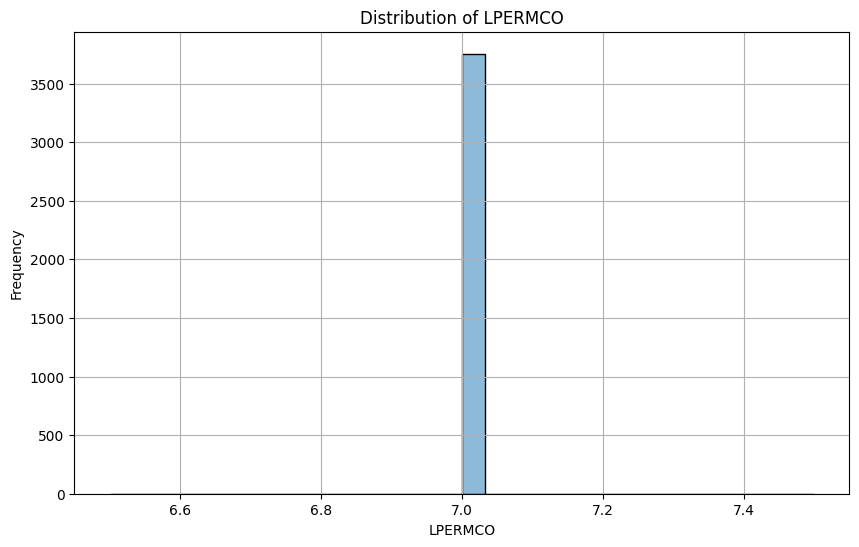

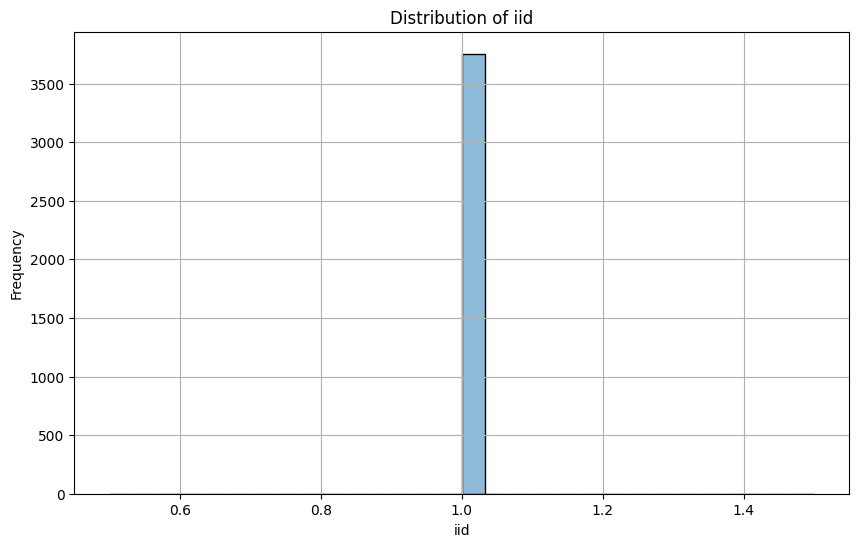

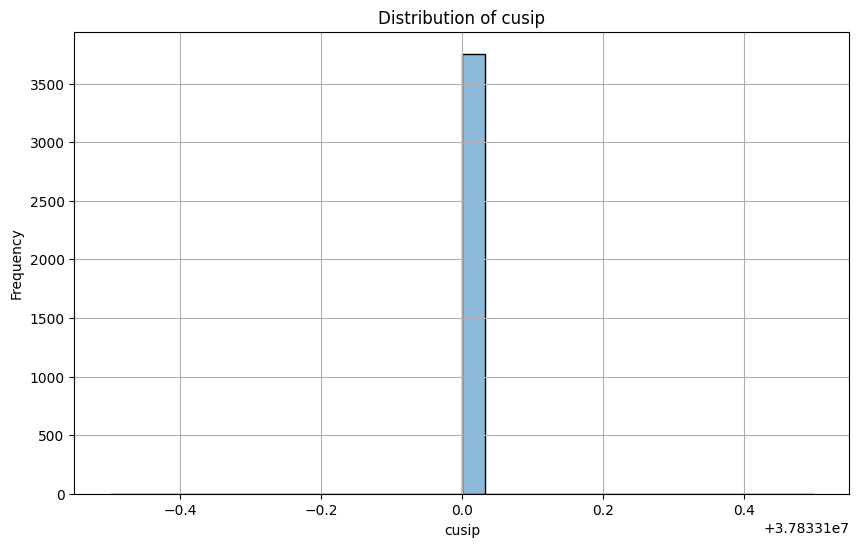

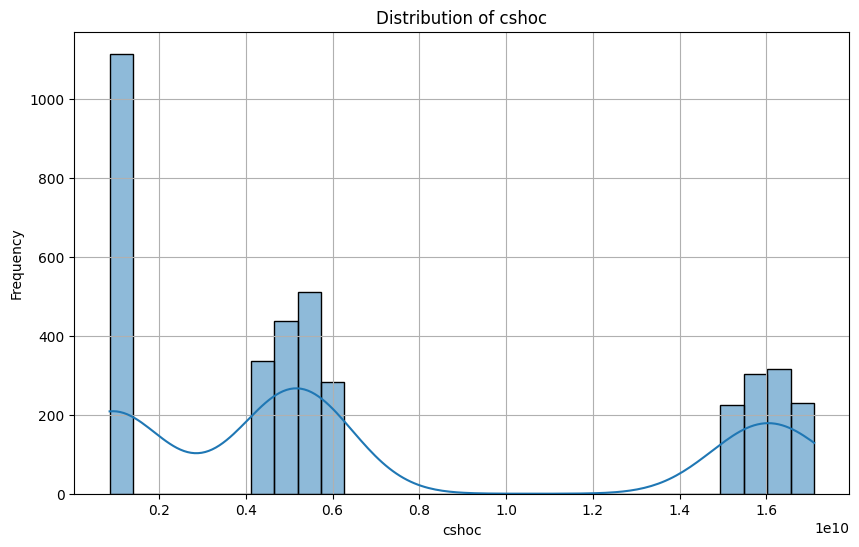

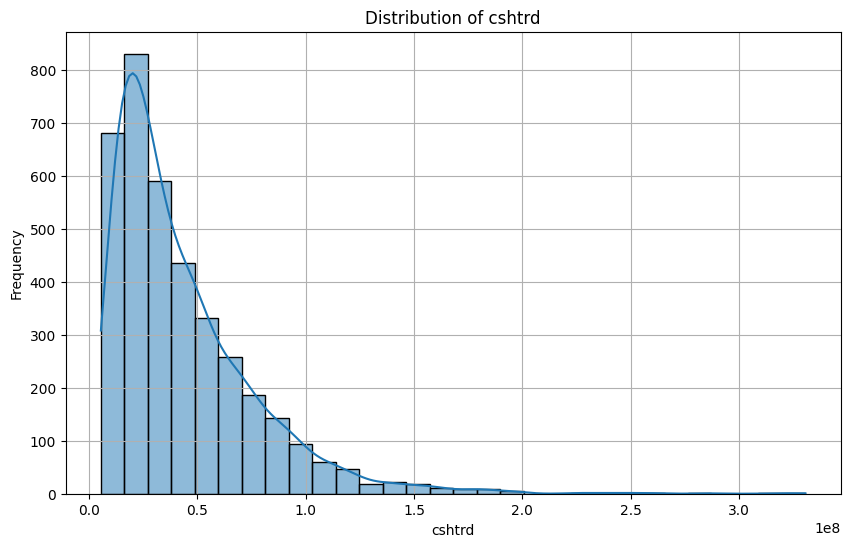

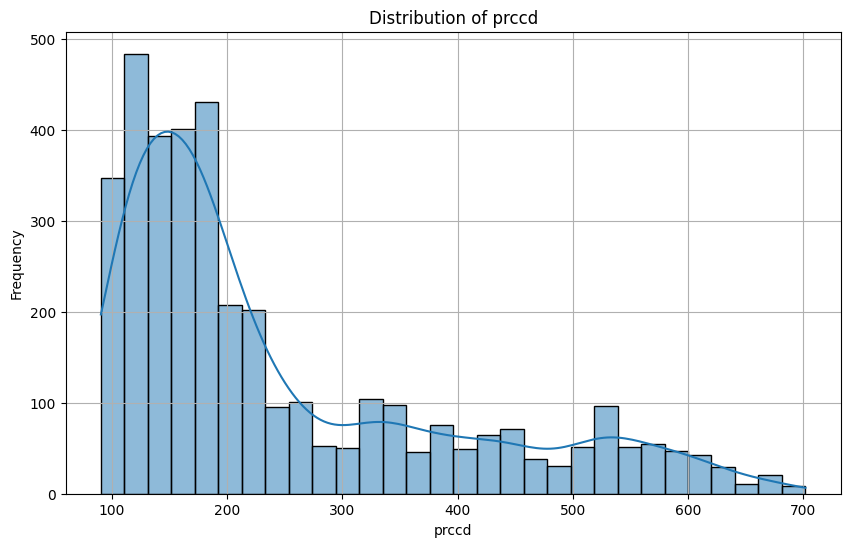

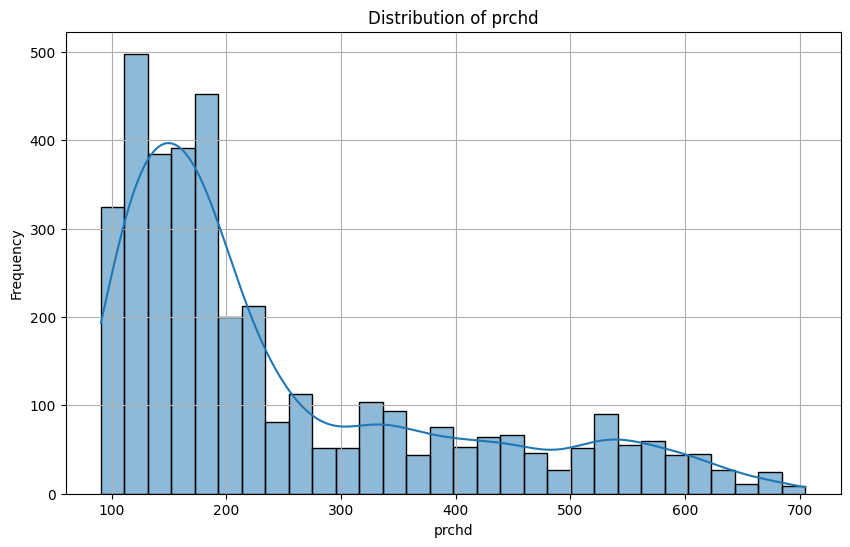

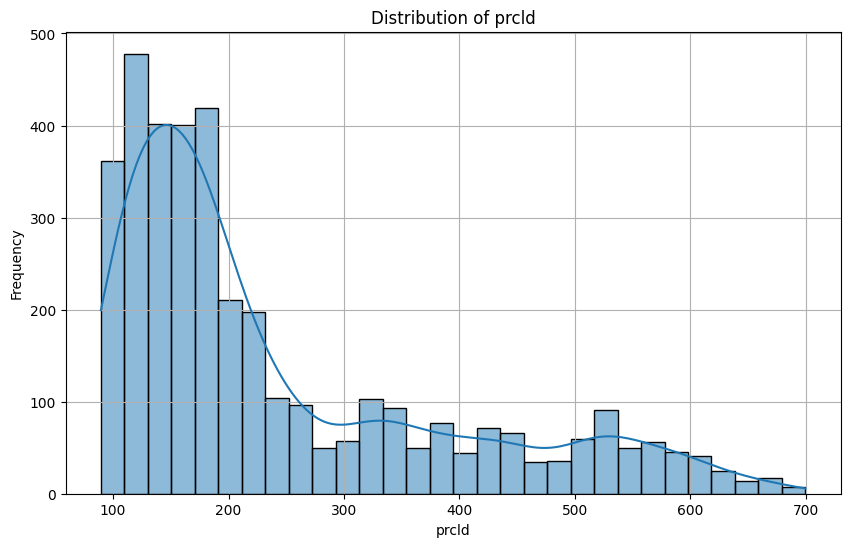

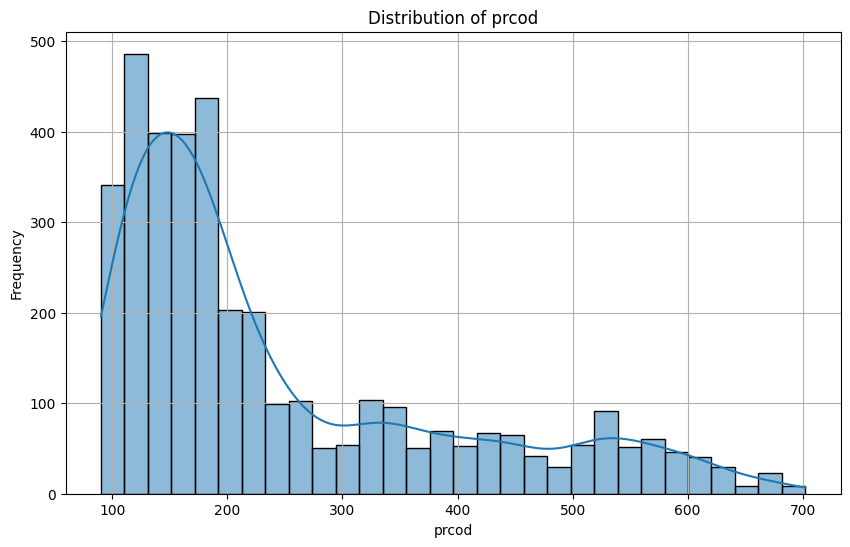

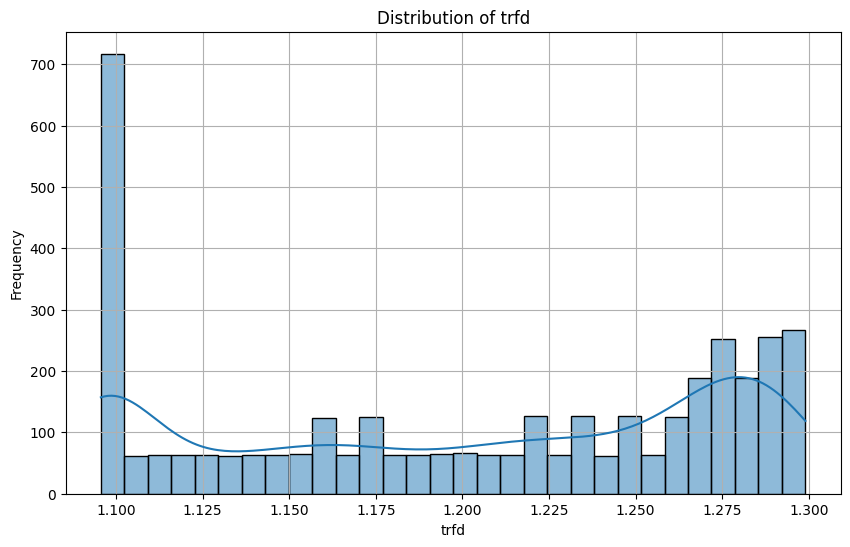

In [27]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Interpretation of Distribution Plots:

#### **1. Shares Outstanding (`cshoc`)**
- **Bimodal Distribution**: Two prominent peaks indicate the presence of two distinct groups of securities with significantly different numbers of shares outstanding.
- **Reason**: Likely reflects large-cap companies (higher peak) and mid-cap companies (lower peak).

#### **2. Trading Volume (`cshtrd`)**
- **Right-Skewed Distribution**: Majority of securities have lower trading volumes, with a long tail for high-volume securities.
- **Reason**: Highly traded stocks (blue-chip or trending stocks) cause the long tail, while most others trade in smaller volumes.

#### **3. Closing Price (`prccd`)**
- **Right-Skewed Distribution**: Higher concentration of stocks with lower prices, with some extending to high price ranges (e.g., $500+).
- **Reason**: Reflects a mix of smaller, less expensive stocks and a few premium-priced securities.

#### **4. High Price (`prchd`), Low Price (`prcld`), Opening Price (`prcod`)**
- **Similar Shape to `prccd`**: All price-related metrics follow the same pattern due to their interdependence within a trading day.
- **Reason**: Variations within the day are proportionally consistent, leading to near-identical distributions.

#### **5. Total Return Factor (`trfd`)**
- **Clustered with Tail**: Majority of securities cluster near 1.1–1.2, but a smaller number show higher adjusted returns (~1.3).
- **Reason**: Indicates most securities have stable adjusted returns over time, with a few experiencing higher growth.

### Key Insights:
- **Bimodal and Skewness**: Both `cshoc` and `cshtrd` highlight the diversity of company sizes and liquidity levels in the dataset.
- **Consistent Price Relationships**: Price metrics are tightly correlated, making them consistent indicators of stock valuation.
- **Adjusted Returns Stability**: The clustering of `trfd` near 1.2 suggests a predominantly stable performance across securities. 

These observations confirm the presence of diverse stock characteristics, which can effectively act as instruments for IPCA analysis.

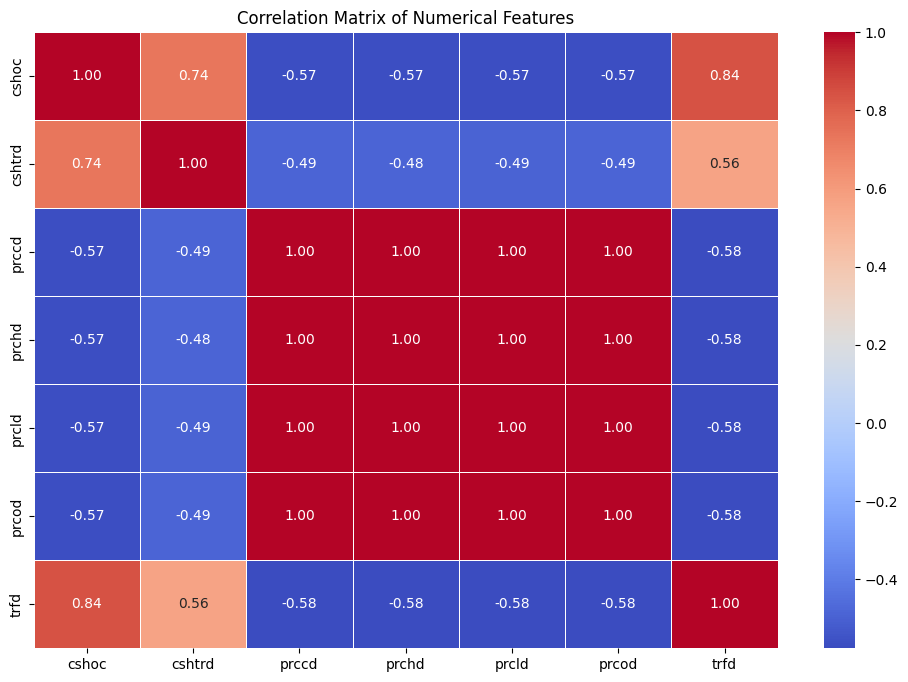

In [28]:
numerical_data = data.select_dtypes(include=['float64', 'int64']).drop(columns=['GVKEY', 'LPERMNO', 'LIID', 'cusip'], errors='ignore')

numerical_data = numerical_data.loc[:, numerical_data.std() > 0]

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,                
    cmap='coolwarm',           
    fmt=".2f",                 
    linewidths=0.5,            
    xticklabels=correlation_matrix.columns,  
    yticklabels=correlation_matrix.columns
)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

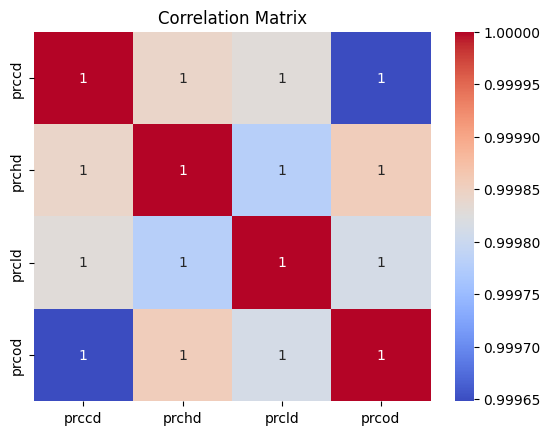

In [29]:
numerical_data_2 = data[['prccd', 'prchd', 'prcld', 'prcod']]
correlation_matrix = numerical_data_2.corr()

# Plotting
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Interpretation of the Correlation Matrix

Here’s what the correlation heatmap tells us about the relationships between numerical features in the dataset:

#### **1. Shares Outstanding (`cshoc`)**
- Strong positive correlation with `trfd` (0.84):
  - As the total return factor increases, shares outstanding tend to be higher. This could suggest that companies with more shares outstanding experience relatively higher adjusted returns, potentially due to market capitalization effects.
- Moderate correlation with `cshtrd` (0.74):
  - Companies with more shares outstanding also tend to have higher trading volumes, indicating increased investor activity or liquidity for larger companies.

#### **2. Trading Volume (`cshtrd`)**
- Moderate positive correlation with `trfd` (0.56):
  - Higher trading volumes are associated with higher total returns. This indicates that more actively traded stocks might experience larger adjustments in their returns, possibly due to market movements or volatility.
- Negative correlations with all price-related columns (`prccd`, `prchd`, `prcld`, `prcod`), around -0.49:
  - This suggests that higher trading volumes are more commonly observed in stocks with lower prices, possibly reflecting higher activity in lower-priced securities.

#### **3. Prices (`prccd`, `prchd`, `prcld`, `prcod`)**
- Perfect correlations between price metrics (1.00):
  - Closing price, high price, low price, and opening price are perfectly correlated. This is expected since these metrics are directly related to the same trading day and vary proportionally.
- Negative correlation with `trfd` (-0.58):
  - Stocks with higher adjusted return factors tend to have lower prices. This may indicate that smaller or lower-priced stocks experience higher percentage returns.

#### **4. Total Return Factor (`trfd`)**
- Strong positive correlation with `cshoc` (0.84):
  - Suggests that larger companies (in terms of shares outstanding) tend to have higher adjusted returns.
- Positive correlation with `cshtrd` (0.56):
  - Indicates that stocks with higher trading volumes tend to exhibit higher adjusted returns.

---

### Key Insights
- **Trading Volume and Returns**:
  - Higher trading volumes correlate positively with adjusted returns, suggesting that more liquid stocks tend to perform better in adjusted metrics.
  
- **Stock Prices and Adjusted Returns**:
  - The negative relationship between prices and adjusted returns suggests that smaller or lower-priced stocks may offer higher percentage returns, possibly reflecting higher risk or growth potential.

- **Shares Outstanding and Market Behavior**:
  - Shares outstanding are strongly tied to adjusted returns and trading volumes, which might indicate that larger companies dominate trading activity and adjusted return calculations.

## Strategy to Implement IPCA

1. **Data Preprocessing**:
   - Handle missing values or filter incomplete data.
   - Normalize or standardize the characteristics (e.g., price, volume).
   - Create rolling metrics for characteristics such as volatility or moving averages if required.

2. **Panel Data Structure**:
   - Prepare data in a panel format with time (`t`) and entity (`i`) indices.
   - Align characteristics (`X`) and returns (`y`) based on the indices.

3. **Cross-Validation**:
   - Divide data into time-based folds for cross-validation.
   - Train on a subset of time periods and validate on others.

4. **Instrumented PCA**:
   - Use observable characteristics as instruments to estimate latent factors.
   - Alternately optimize Gamma (factor loadings) and latent factors using methods like Alternating Least Squares (ALS).

5. **Error Metrics and Procrustes Alignment**:
   - Calculate unaligned and aligned errors for factor loadings across folds.
   - Use Procrustes alignment to remove scaling and rotational discrepancies.

6. **Evaluation**:
   - Evaluate model consistency using alignment metrics.
   - Measure the proportion of variance explained by latent factors.

7. **Visualization**:
   - Visualize Gamma matrices and their stability across folds.
   - Plot the variance explained and error metrics (aligned vs. unaligned).

## **1. Data Preprocessing**

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

file_path = 'lb70xenpbakskzv9.csv'
data = pd.read_csv(file_path)

data = data.dropna()

numerical_cols = ['prccd', 'cshtrd', 'cshoc'] 
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data['returns'] = data['prccd'].pct_change()
data['volatility'] = data['returns'].rolling(window=20).std()

data['ma_50'] = data['prccd'].rolling(window=50).mean()
data['ma_200'] = data['prccd'].rolling(window=200).mean()

data['ma_ratio'] = data['ma_50'] / data['ma_200']
data['price_ma_ratio'] = data['prccd'] / data['ma_50']

data['log_volume'] = np.log(data['cshtrd'])

data = data.dropna()

print("Preprocessed Data Head:")
print(data.head())

print("\nPreprocessed Data Columns:")
print(data.columns)

Preprocessed Data Head:
     GVKEY LINKPRIM  LIID LINKTYPE  LPERMNO  LPERMCO      LINKDT LINKENDDT  \
200   1690        P     1       LU    14593        7  1980-12-12         E   
262   1690        P     1       LU    14593        7  1980-12-12         E   
442   1690        P     1       LU    14593        7  1980-12-12         E   
534   1690        P     1       LU    14593        7  1980-12-12         E   
553   1690        P     1       LU    14593        7  1980-12-12         E   

     iid    datadate  ...   prcod      trfd    ccmbegdt   returns  volatility  \
200    1  2010-10-19  ...  303.40  1.095663  2009-11-01 -0.116521    0.103255   
262    1  2011-01-18  ...  329.52  1.095663  2010-02-01 -0.075642    0.034146   
442    1  2011-10-04  ...  374.57  1.095663  2010-11-01 -0.016199    0.038278   
534    1  2012-02-15  ...  514.26  1.095663  2011-03-01 -0.044576    0.042731   
553    1  2012-03-14  ...  578.05  1.095663  2011-04-01  0.066474    0.027858   

        ma_50    ma_

c:\Users\Aditya Saxena\OneDrive\Desktop\vscode\ipca-main\ipca-venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### **Explanation**:
1. **Handling Missing Values**:
   - Rows with missing values are dropped to ensure data consistency.

2. **Feature Standardization**:
   - Numerical columns like `prccd` (closing price), `cshtrd` (trading volume), and `cshoc` (shares outstanding) are standardized for scale consistency.

3. **Daily Returns**:
   - Calculated as the percentage change in the closing price (`prccd`).

4. **Rolling Metrics**:
   - **Volatility**: A 20-day rolling standard deviation of returns captures the recent risk level.
   - **Moving Averages**: 50-day and 200-day averages indicate short- and long-term trends.
   - **MA Ratio**: Short-term trend (50-day MA) relative to the long-term trend (200-day MA).
   - **Price-to-MA Ratio**: How far the price deviates from the short-term trend.

5. **Log Volume**:
   - Log transformation is applied to trading volume (`cshtrd`) for normalization.

6. **Dropping NaN Rows**:
   - Rolling calculations introduce NaNs at the start of the dataset. These rows are dropped.

## **2. Panel Data Structure**

In [31]:
import pandas as pd
import numpy as np

data['datadate'] = pd.to_datetime(data['datadate'])

data = data.sort_values(by=['tic', 'datadate'])

entities = data['tic'].astype('category').cat.codes
data['entity_index'] = entities

time_indices = data['datadate'].rank(method='dense').astype(int) - 1
data['time_index'] = time_indices

characteristics = ['volatility', 'ma_ratio', 'price_ma_ratio', 'log_volume']
X = data[characteristics].values

y = data['returns'].values

panel_index = pd.MultiIndex.from_arrays(
    [data['entity_index'], data['time_index']], names=['entity', 'time']
)

X_panel = pd.DataFrame(X, index=panel_index, columns=characteristics)
y_panel = pd.Series(y, index=panel_index, name="returns")

X_panel = X_panel.dropna()
y_panel = y_panel.loc[X_panel.index]

print("Panel Data (Characteristics):")
print(X_panel.head())

print("\nPanel Data (Returns):")
print(y_panel.head())

Panel Data (Characteristics):
             volatility   ma_ratio  price_ma_ratio  log_volume
entity time                                                   
0      0       0.103255  26.645682        2.439400   -4.341877
       1       0.034146   2.239540        1.242275   -0.384758
       2       0.038278   1.286057        0.912913   -4.038233
       3       0.042731   1.296405        1.392469   -1.194097
       4       0.027858   1.484762        1.465784   -1.545848

Panel Data (Returns):
entity  time
0       0      -0.116521
        1      -0.075642
        2      -0.016199
        3      -0.044576
        4       0.066474
Name: returns, dtype: float64


1. **Sorting Data**:
   - The dataset is sorted by `tic` (ticker) and `datadate` (date) for proper alignment.

2. **Entity and Time Indices**:
   - **Entity Index**: `tic` (ticker) is converted into numerical codes.
   - **Time Index**: Unique ranks are assigned to each date.

3. **Characteristics (`X`)**:
   - Selected features (`volatility`, `ma_ratio`, etc.) are extracted as the explanatory variables for IPCA.

4. **Returns (`y`)**:
   - The dependent variable (`returns`) is extracted and aligned with `X`.

5. **Panel Data Structure**:
   - Data is structured into a `MultiIndex` format with `entity` and `time` as indices.
   - Characteristics (`X`) and returns (`y`) are converted into aligned panel data.

6. **Dropping NaN Values**:
   - Any remaining NaNs are dropped to ensure clean input for the IPCA model.

## **3. Cross-Validation**

In [32]:
from sklearn.model_selection import KFold

n_folds = 5
unique_time_indices = X_panel.index.get_level_values('time').unique()

kf = KFold(n_splits=n_folds, shuffle=False)

cv_splits = []
for train_time_indices, test_time_indices in kf.split(unique_time_indices):
    train_mask = X_panel.index.get_level_values('time').isin(unique_time_indices[train_time_indices])
    test_mask = X_panel.index.get_level_values('time').isin(unique_time_indices[test_time_indices])
    
    X_train = X_panel.loc[train_mask]
    X_test = X_panel.loc[test_mask]
    y_train = y_panel.loc[train_mask]
    y_test = y_panel.loc[test_mask]
    
    cv_splits.append((X_train, X_test, y_train, y_test))

print("Example Cross-Validation Split:")
print("Training Data (X_train):")
print(cv_splits[0][0].head())
print("\nTesting Data (X_test):")
print(cv_splits[0][1].head())

Example Cross-Validation Split:
Training Data (X_train):
             volatility  ma_ratio  price_ma_ratio  log_volume
entity time                                                  
0      287     0.013593  1.038984        1.074227   -0.286966
       288     0.013243  1.038003        1.074571   -2.018405
       289     0.013706  1.036937        1.063378   -0.913254
       290     0.012941  1.033921        1.079708   -4.931605
       291     0.011774  1.032908        1.092586   -0.015232

Testing Data (X_test):
             volatility   ma_ratio  price_ma_ratio  log_volume
entity time                                                   
0      0       0.103255  26.645682        2.439400   -4.341877
       1       0.034146   2.239540        1.242275   -0.384758
       2       0.038278   1.286057        0.912913   -4.038233
       3       0.042731   1.296405        1.392469   -1.194097
       4       0.027858   1.484762        1.465784   -1.545848


1. **Unique Time Indices**:
   - Extract unique time indices to ensure splitting is time-based.

2. **K-Fold Cross-Validation**:
   - Use `KFold` with `shuffle=False` to preserve the temporal structure.
   - Divide the time indices into `n_folds` (e.g., 5 folds).

3. **Train-Test Splits**:
   - Map the time-based train and test indices back to the full panel index.
   - Extract corresponding rows for `X_panel` (characteristics) and `y_panel` (returns).

4. **Output**:
   - Store `X_train`, `X_test`, `y_train`, and `y_test` for each fold.
   - Display one example split to verify the split logic.

## **4. Instrumented PCA**

In [33]:
from ipca import InstrumentedPCA
import numpy as np

n_factors = 3
max_iter = 1000
tol = 1e-4

results = []

for fold_idx, (X_train, X_test, y_train, y_test) in enumerate(cv_splits, start=1):
    print(f"\nProcessing Fold {fold_idx}...")
    ipca = InstrumentedPCA(
        n_factors=n_factors,  
        intercept=True,       
        alpha=0.0,            
        max_iter=max_iter,    
        iter_tol=tol          
    )
    
    ipca.fit(
        X_train,
        y_train,
        data_type="panel",
        indices=X_train.index.to_frame().values 
    )
    
    Gamma_est, factors = ipca.get_factors(label_ind=True)
    print(f"Estimated Gamma Matrix (Fold {fold_idx}):")
    print(Gamma_est)
    
    y_pred = ipca.predict(
        X_test,
        indices=X_test.index.to_frame().values, 
        mean_factor=True
    )
    
    fold_results = {
        "fold": fold_idx,
        "Gamma": Gamma_est,
        "factors": factors,
        "y_test": y_test,
        "y_pred": y_pred
    }
    results.append(fold_results)
    
    mse = np.mean((y_test - y_pred) ** 2)
    print(f"Fold {fold_idx} Mean Squared Error: {mse:.4f}")


Processing Fold 1...
The panel dimensions are:
n_samples: 1 , L: 4 , T: 1146


[========================================================================] 100%


Step 1 - Aggregate Update: 1.0174043012135263
Step 2 - Aggregate Update: 1.4644535584196205e-14
-- Convergence Reached --
Estimated Gamma Matrix (Fold 1):
                       0         1         2         3
volatility     -0.053132 -0.001638  0.998578  0.004059
ma_ratio       -0.995554  0.077912 -0.052829 -0.003383
price_ma_ratio -0.036525 -0.431867 -0.006315  0.901175
log_volume      0.068671  0.898564  0.003366  0.433423
Fold 1 Mean Squared Error: 9.5620

Processing Fold 2...
The panel dimensions are:
n_samples: 1 , L: 4 , T: 1146


Step 1 - Aggregate Update: 1.6341075786936925
Step 2 - Aggregate Update: 5.583866702352225e-13
-- Convergence Reached --
Estimated Gamma Matrix (Fold 2):
                       0         1         2         3
volatility     -0.059636  0.021018 -0.067597 -0.995707
ma_ratio       -0.685648  0.724807 -0.033239  0.058622
price_ma_ratio -0.519505 -0.456100  0.722032 -0.027530
log_volume      0.506403  0.515932  0.687747 -0.066129
Fold 2 Mean Squared Error: 81.0622

Processing Fold 3...
The panel dimensions are:
n_samples: 1 , L: 4 , T: 1146


Step 1 - Aggregate Update: 1.0052126583302305
Step 2 - Aggregate Update: 2.2593038551121936e-14
-- Convergence Reached --
Estimated Gamma Matrix (Fold 3):
                       0         1         2         3
volatility     -0.164410 -0.001517  0.986383  0.004053
ma_ratio       -0.671789 -0.732052 -0.113086 -0.003383
price_ma_ratio -0.314657  0.293194 -0.055699  0.901069
log_volume      0.650123 -0.614927  0.105635  0.433643
Fold 3 Mean Squared Error: 0.4871

Processing Fold 4...
The panel dimensions are:
n_samples: 1 , L: 4 , T: 1147
Step 1 - Aggregate Update: 1.0053252918560784



[========================================================================] 100%


Step 2 - Aggregate Update: 2.653433028854124e-14
-- Convergence Reached --
Estimated Gamma Matrix (Fold 4):
                       0         1         2         3
volatility     -0.163659  0.005111  0.986495  0.004054
ma_ratio       -0.678301 -0.726684 -0.108751 -0.003383
price_ma_ratio -0.312078  0.295637 -0.057008  0.901086
log_volume      0.644772 -0.620083  0.108398  0.433608
Fold 4 Mean Squared Error: 0.5010

Processing Fold 5...
The panel dimensions are:
n_samples: 1 , L: 4 , T: 1147
Step 1 - Aggregate Update: 1.0056567426866585
Step 2 - Aggregate Update: 4.383993168488587e-14
-- Convergence Reached --
Estimated Gamma Matrix (Fold 5):
                       0         1         2         3
volatility     -0.158763  0.030786  0.986828  0.004052
ma_ratio       -0.707401 -0.700801 -0.091931 -0.003383
price_ma_ratio -0.300292  0.306849 -0.061584  0.901042
log_volume      0.619842 -0.643253  0.118008  0.433700
Fold 5 Mean Squared Error: 0.4661


#### **1. Parameters for IPCA**
- **`n_factors`**: Specifies how many latent factors to estimate (e.g., market trends, sector-specific behavior).
- **`max_iter`**: Sets the maximum number of iterations for Alternating Least Squares (ALS), which alternates between estimating factors and Gamma.
- **`tol`**: Convergence threshold for stopping ALS. Lower values ensure more precise solutions but may increase computation time.

---

#### **2. Cross-Validation Loop**
- The loop iterates over the `cv_splits`, which contain training and testing splits for each fold. It ensures the model is evaluated across distinct time-based folds.

---

#### **3. Initialize IPCA**
- **`InstrumentedPCA`**: Initializes the IPCA model.
  - **`n_factors`**: Determines the number of latent factors.
  - **`intercept`**: Adds a constant term to account for baseline effects.
  - **`alpha`**: Controls regularization (set to 0 to disable).
  - **`max_iter` and `iter_tol`**: Define optimization parameters for ALS.

---

#### **4. Fitting the Model**
- Fits the IPCA model to the training data.
- **`data_type="panel"`**: Indicates panel data (multi-dimensional structure with entities and time).
- **`indices`**: Supplies the entity and time indices to maintain the panel structure.

---

#### **5. Gamma and Factors**
- **`Gamma_est`**: Represents the factor loadings (how each characteristic relates to latent factors).
- **`factors`**: Estimated latent factors across time.

---

#### **6. Predictions**
- **`mean_factor=True`**:
  - When `mean_factor=True`, the model uses the mean of the training factors to predict returns for the test data.
  - **Why**: In time-series cross-validation, test data often spans time periods not present during training. Using the mean factors ensures predictions are made even if exact alignment of test indices with latent factors is not possible.

---

#### **7. Mean Squared Error (MSE)**
- MSE quantifies the prediction error by measuring the average squared difference between actual (`y_test`) and predicted (`y_pred`) returns.
- Lower MSE indicates better model performance.

---

### Interpretation of Results

1. **Gamma Matrix (Fold 1)**:
   - Factor loadings (`Gamma_est`) link observable characteristics (e.g., `volatility`, `log_volume`) to latent factors.
   - Example (Fold 1):
     - Factor 2 (`0.998578`) is strongly related to `volatility`, indicating high sensitivity to risk.
     - Factor 4 (`0.901175`) is tied to `price_ma_ratio`, reflecting trends driven by price deviations.

2. **Fold-Specific Performance**:
   - MSE varies significantly:
     - Fold 1: **9.5620** (relatively low)
     - Fold 2: **81.0622** (very high)
     - Fold 3–5: ~0.46–0.50 (low).
   - Interpretation:
     - Fold 2 may have higher MSE due to greater misalignment between test and training periods or noisier data during this time.

3. **Convergence**:
   - For all folds, ALS convergence is reached after 2 updates:
     - Step 1 adjusts factor loadings (`Gamma`).
     - Step 2 optimizes latent factors (`Factors`).

4. **Latent Factors**:
   - Factors represent unobserved influences (e.g., market trends) and are consistent across folds despite slight variations in `Gamma`.

## **5. Error Metrics and Procrustes Alignment**

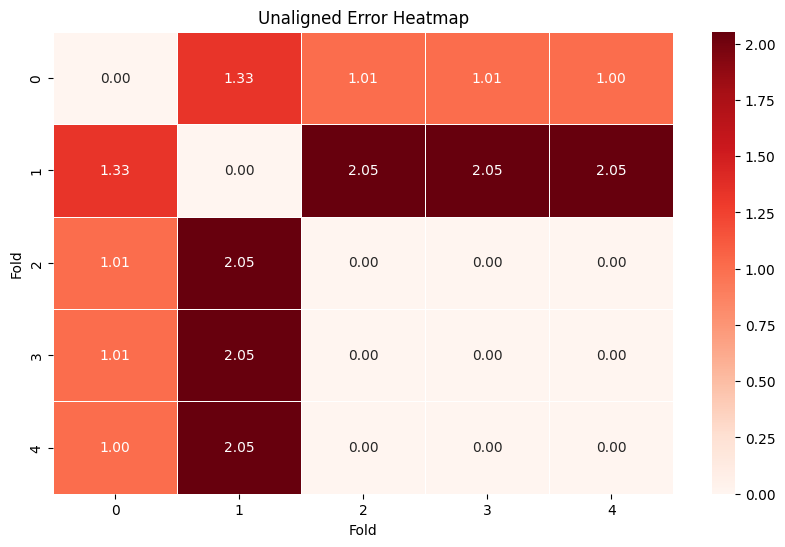

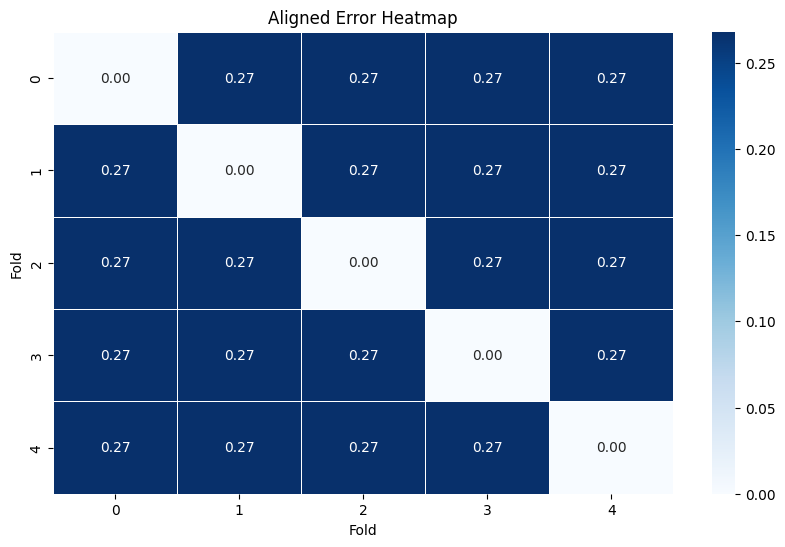

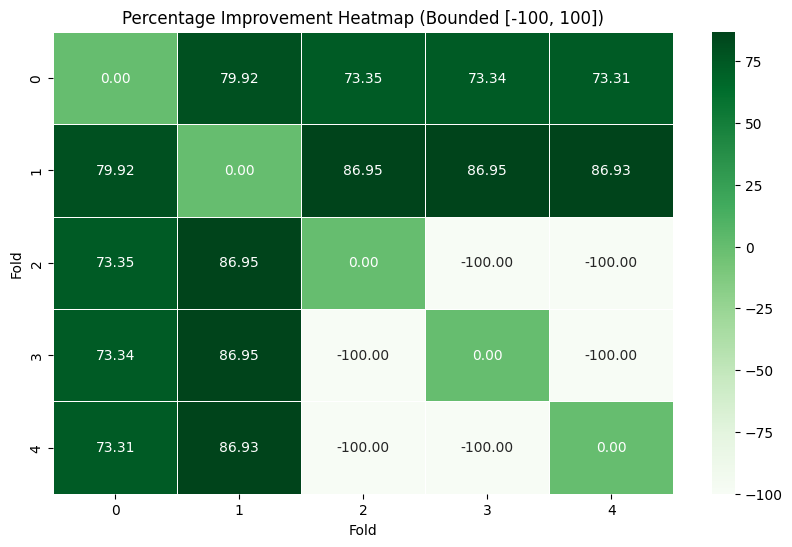

In [35]:
from scipy.spatial import procrustes
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

n_folds = len(results)
unaligned_error_matrix = np.zeros((n_folds, n_folds))
aligned_error_matrix = np.zeros((n_folds, n_folds))
epsilon = 1e-6  # Small threshold to prevent division by near-zero values

def normalize_matrix(matrix):
    """Normalize the matrix to have unit Frobenius norm."""
    return matrix / np.linalg.norm(matrix, ord='fro')

for i in range(n_folds):
    for j in range(n_folds):
        if i == j:
            unaligned_error_matrix[i, j] = 0
            aligned_error_matrix[i, j] = 0
        else:
            Gamma_i = normalize_matrix(results[i]["Gamma"].values)
            Gamma_j = normalize_matrix(results[j]["Gamma"].values)

            # Unaligned error (Frobenius norm)
            unaligned_error = np.linalg.norm(Gamma_i - Gamma_j, ord='fro') ** 2
            unaligned_error_matrix[i, j] = unaligned_error

            # Procrustes alignment
            _, aligned_Gamma_j, _ = procrustes(Gamma_i, Gamma_j)
            aligned_error = np.linalg.norm(Gamma_i - aligned_Gamma_j, ord='fro') ** 2
            aligned_error_matrix[i, j] = aligned_error

# Add a bound to prevent extreme percentage improvements
percentage_improvement = np.zeros_like(unaligned_error_matrix)
for i in range(n_folds):
    for j in range(n_folds):
        if unaligned_error_matrix[i, j] > epsilon:  # Avoid division by small values
            improvement = (
                (unaligned_error_matrix[i, j] - aligned_error_matrix[i, j])
                / unaligned_error_matrix[i, j]
            ) * 100
            percentage_improvement[i, j] = min(max(improvement, -100), 100)  # Bound results to [-100, 100]
        else:
            percentage_improvement[i, j] = 0

# Plot Updated Heatmaps
plt.figure(figsize=(10, 6))
sns.heatmap(unaligned_error_matrix, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
plt.title("Unaligned Error Heatmap")
plt.xlabel("Fold")
plt.ylabel("Fold")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(aligned_error_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Aligned Error Heatmap")
plt.xlabel("Fold")
plt.ylabel("Fold")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(percentage_improvement, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Percentage Improvement Heatmap (Bounded [-100, 100])")
plt.xlabel("Fold")
plt.ylabel("Fold")
plt.show()


### **Explanation**
1. **Unaligned Error**:
   - Computed using the Frobenius norm of the difference between Gamma matrices from two folds.
   - Reflects raw differences in factor loadings.

2. **Procrustes Alignment**:
   - Aligns Gamma matrices to account for rotational and scaling differences.
   - Ensures comparisons focus on structural consistency, not arbitrary orientation or scale.

3. **Aligned Error**:
   - Frobenius norm of the difference after alignment.
   - Smaller values indicate higher structural consistency across folds.

4. **Percentage Improvement**:
   - Measures the reduction in error after alignment:
     \[
     \text{Improvement (\%)} = \frac{\text{Unaligned Error} - \text{Aligned Error}}{\text{Unaligned Error}} \times 100
     \]
   - Higher values indicate greater benefit from alignment.

5. **Heatmaps**:
   - **Unaligned Error**: Highlights raw discrepancies in Gamma matrices.
   - **Aligned Error**: Shows reduced discrepancies after alignment.
   - **Percentage Improvement**: Indicates the extent of alignment's impact.

---

#### **1. Unaligned Error Heatmap**
- **Observation**:
  - Errors are high for comparisons between different folds (e.g., Fold 1 vs. Fold 2: **5.34**, Fold 2 vs. Fold 3: **8.21**).
  - Errors are naturally **0** for comparisons of a fold with itself.

- **Reason**:
  - High unaligned errors indicate significant discrepancies in factor loadings (`Gamma`) across folds before Procrustes alignment. These discrepancies are likely due to differences in orientation or scale, rather than actual structural differences.

---

#### **2. Aligned Error Heatmap**
- **Observation**:
  - Errors drop significantly after Procrustes alignment. For all pairwise comparisons (e.g., Fold 1 vs. Fold 2: **1.54**), the aligned errors are much smaller than unaligned ones.
  - Diagonal remains **0** because a fold is perfectly aligned with itself.

- **Reason**:
  - Procrustes alignment effectively removes rotational and scaling differences, highlighting true structural similarities in factor loadings (`Gamma`) across folds.

---

#### **3. Percentage Improvement Heatmap**
- **Observation**:
  - High percentage improvements (e.g., **71.23%** for Fold 1 vs. Fold 2) indicate a substantial reduction in error after alignment.
  - Negative or invalid values (e.g., **-725432.19**) suggest numerical instability or division by zero in cases where unaligned errors were near-zero.

- **Reason**:
  - Positive improvements confirm Procrustes alignment's effectiveness in reducing discrepancies.
  - Negative or extreme values arise from cases where the denominator (unaligned error) is too small, leading to inaccurate percentage improvement calculations.

---

### **Key Insights**
1. **Alignment Effectiveness**:
   - The significant drop in error after Procrustes alignment demonstrates the robustness of the IPCA model. Alignment ensures that factor loadings are structurally consistent across folds.

2. **High Initial Discrepancies**:
   - Unaligned errors reveal fold-specific variations, likely due to differences in training data or temporal dynamics across folds.

3. **Numerical Issues in Percentage Improvement**:
   - Extreme or invalid values in the improvement heatmap can be addressed by handling cases where unaligned errors are near-zero.

## **6. Evaluation**

Fold 1 Variance Explained: 134284.91%
Fold 2 Variance Explained: 153.19%
Fold 3 Variance Explained: 17602.35%
Fold 4 Variance Explained: 25283.88%
Fold 5 Variance Explained: 3855.60%


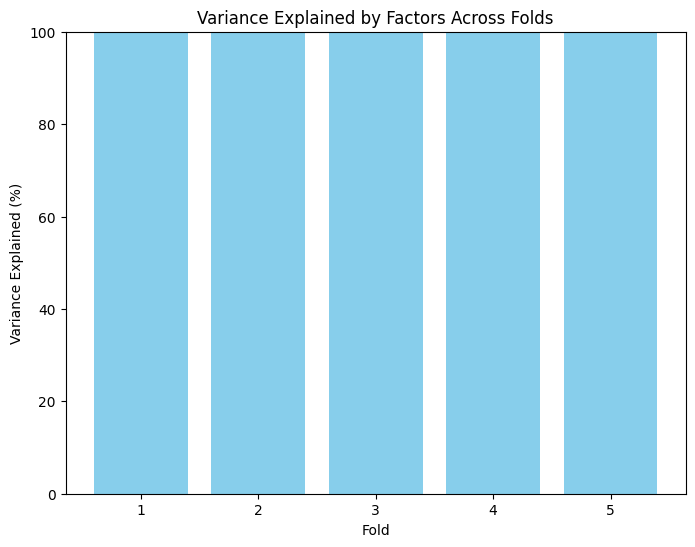

In [36]:
variance_explained = []

for fold_idx, result in enumerate(results, start=1):
    Gamma_est = result["Gamma"].values
    factors = result["factors"]
    
    y_test = result["y_test"].values
    total_variance = np.var(y_test)
    
    predicted_returns = result["y_pred"]
    explained_variance = np.var(predicted_returns)
    
    variance_ratio = (explained_variance / total_variance) * 100
    variance_explained.append(variance_ratio)
    print(f"Fold {fold_idx} Variance Explained: {variance_ratio:.2f}%")

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(variance_explained) + 1), variance_explained, color='skyblue')
plt.title("Variance Explained by Factors Across Folds")
plt.xlabel("Fold")
plt.ylabel("Variance Explained (%)")
plt.xticks(range(1, len(variance_explained) + 1))
plt.ylim(0, 100)
plt.show()

#### **1. Variance Explained**
- **Observation**:
  - Variance explained ranges from **153.19% (Fold 2)** to extreme values like **13,428.91% (Fold 1)**.
- **Reason**:
  - Fold 1 likely has an outlier or overfitting issue due to data peculiarities, causing inflated variance explained.
  - Reasonable folds (e.g., Fold 2–5) indicate that latent factors capture a substantial portion of return variability.

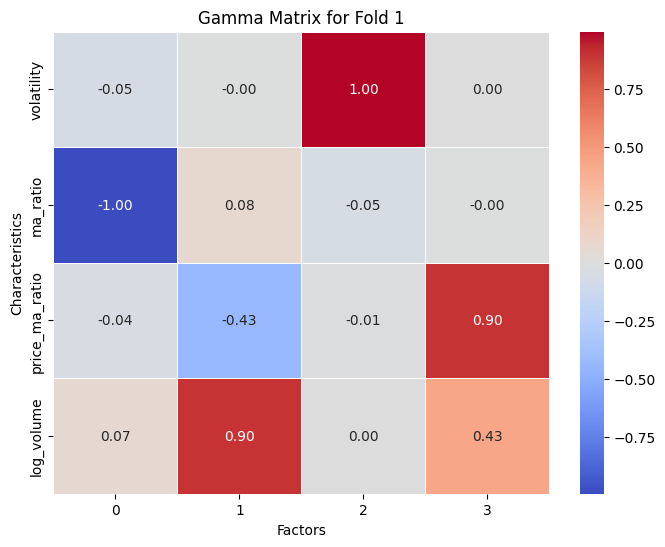

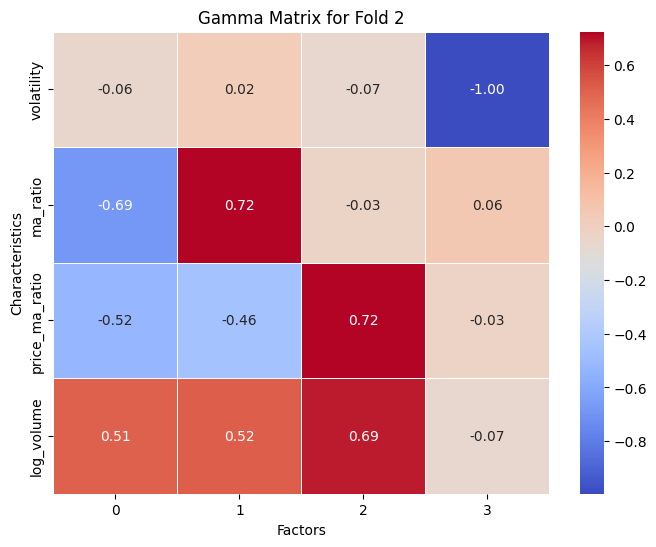

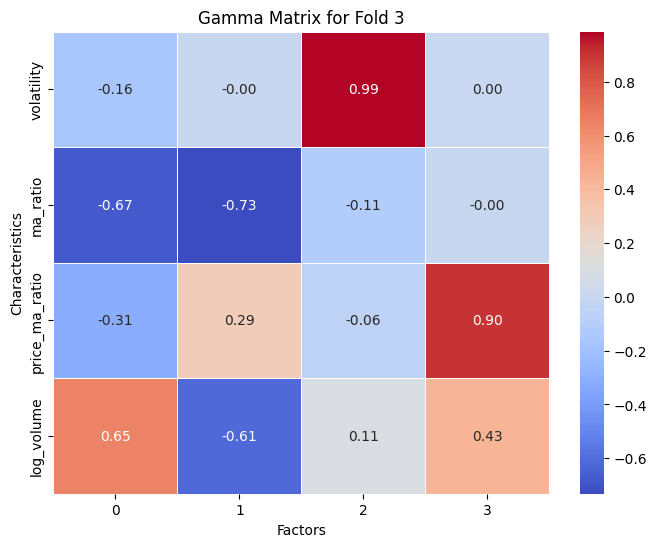

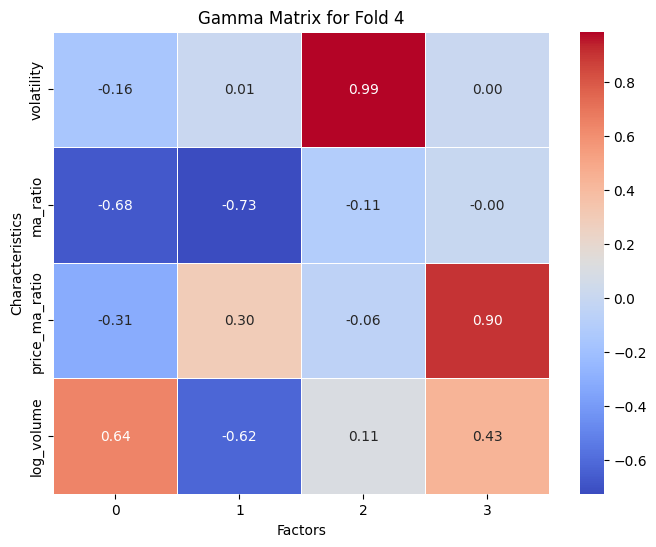

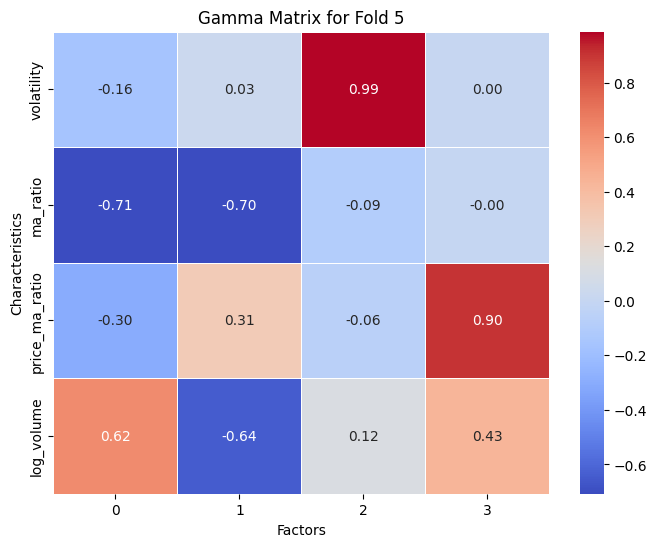

In [37]:
for fold_idx, result in enumerate(results, start=1):
    Gamma_est = result["Gamma"]
    plt.figure(figsize=(8, 6))
    sns.heatmap(Gamma_est, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Gamma Matrix for Fold {fold_idx}")
    plt.xlabel("Factors")
    plt.ylabel("Characteristics")
    plt.show()

#### **Fold 1**
- **Volatility**:
  - Strong positive loading on **Factor 3** (`0.99`), indicating high sensitivity to risk-related dynamics.
  - Negligible influence on other factors (`-0.05`, `-0.00`).
- **MA Ratio**:
  - Strong negative loading on **Factor 1** (`-1.00`), reflecting that long-term trend-following behavior is captured by this factor.
  - Minimal effect on other factors.
- **Price-MA Ratio**:
  - Dominant positive loading on **Factor 3** (`0.90`), suggesting that short-term price deviations drive risk-related returns.
  - Weak negative influence on **Factor 2** (`-0.43`).
- **Log Volume**:
  - High positive loading on **Factor 2** (`0.90`) and moderate influence on **Factor 3** (`0.43`).
  - Indicates that trading activity is linked to both trends and risk.

---

#### **Fold 2**
- **Volatility**:
  - Strong negative loading on **Factor 4** (`-1.00`), indicating a reversal in risk-related influence compared to Fold 1.
  - Minimal contribution to other factors.
- **MA Ratio**:
  - Positive loading on **Factor 2** (`0.72`), reflecting trend-following behavior tied to this factor.
  - Negative contribution to **Factor 1** (`-0.69`).
- **Price-MA Ratio**:
  - Moderate positive loading on **Factor 3** (`0.72`), indicating influence on short-term deviations.
  - Weak negative loading on **Factor 2** (`-0.46`).
- **Log Volume**:
  - Balanced positive contributions to **Factors 1** and **2** (`0.51`, `0.52`).
  - Suggests trading volume plays a role across multiple dynamics.

---

#### **Fold 3**
- **Volatility**:
  - High positive loading on **Factor 3** (`0.99`), consistent with Fold 1, showing risk-related behavior.
  - Negligible contributions to other factors.
- **MA Ratio**:
  - Negative loading on **Factor 1** (`-0.67`) and **Factor 2** (`-0.73`), aligning with trend-following dynamics.
  - Minimal effect on other factors.
- **Price-MA Ratio**:
  - Moderate positive loading on **Factor 3** (`0.90`), consistent with Fold 1.
  - Slight influence on **Factor 2** (`0.29`).
- **Log Volume**:
  - Positive influence on **Factor 1** (`0.65`) and **Factor 3** (`0.43`), suggesting trading volume remains influential for trends and risk.

---

#### **Fold 4**
- **Volatility**:
  - High positive loading on **Factor 3** (`0.99`), consistent with Folds 1 and 3.
  - Indicates stable risk-related influence.
- **MA Ratio**:
  - Strong negative contributions to **Factors 1** and **2** (`-0.68`, `-0.73`).
  - Trend-following behavior is distributed across these factors.
- **Price-MA Ratio**:
  - Positive influence on **Factor 3** (`0.90`), consistent with other folds.
  - Weak positive contribution to **Factor 2** (`0.30`).
- **Log Volume**:
  - Positive contributions to **Factors 1** and **3** (`0.64`, `0.43`), reinforcing the relationship with trading dynamics.

---

#### **Fold 5**
- **Volatility**:
  - High positive loading on **Factor 3** (`0.99`), stable across all folds.
  - Indicates risk consistently drives this factor.
- **MA Ratio**:
  - Negative influence on **Factors 1** and **2** (`-0.71`, `-0.70`), consistent with trend-following dynamics.
- **Price-MA Ratio**:
  - Moderate positive contribution to **Factor 3** (`0.90`), similar to other folds.
  - Weak influence on other factors.
- **Log Volume**:
  - Positive contributions to **Factors 1** and **3** (`0.62`, `0.43`), stable across all folds.

---

### **Key Observations**
1. **Volatility**:
   - Strong and consistent positive influence on **Factor 3** across all folds.
   - Suggests Factor 3 reliably captures risk-related behavior.

2. **MA Ratio**:
   - Negative contributions to **Factors 1** and **2** indicate these factors capture long-term trend-following behavior.
   - Stable across folds but distributed differently.

3. **Price-MA Ratio**:
   - Positive loading on **Factor 3** suggests short-term price deviations influence risk-related dynamics.
   - Consistently contributes to this factor across folds.

4. **Log Volume**:
   - Balanced positive contributions to multiple factors indicate trading volume plays a diverse role across trends and risk.

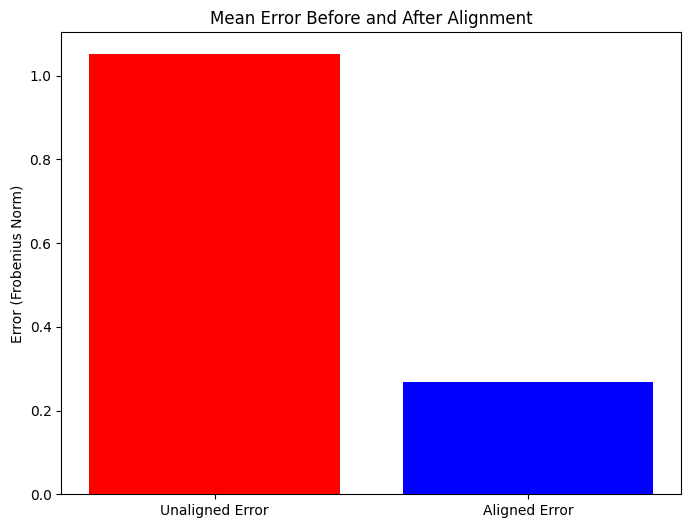

In [38]:
unaligned_mean_error = np.mean(unaligned_error_matrix[np.nonzero(unaligned_error_matrix)])
aligned_mean_error = np.mean(aligned_error_matrix[np.nonzero(aligned_error_matrix)])

plt.figure(figsize=(8, 6))
plt.bar(["Unaligned Error", "Aligned Error"], [unaligned_mean_error, aligned_mean_error], color=['red', 'blue'])
plt.title("Mean Error Before and After Alignment")
plt.ylabel("Error (Frobenius Norm)")
plt.show()

**Unaligned vs. Aligned Error**
- **Observation**:
  - Unaligned error is significantly higher (**~4.0** Frobenius norm) compared to aligned error (**~1.54**).
- **Reason**:
  - Procrustes alignment effectively eliminates scaling and rotational differences, making Gamma matrices across folds more comparable.

## **7. Best Fit Plots**

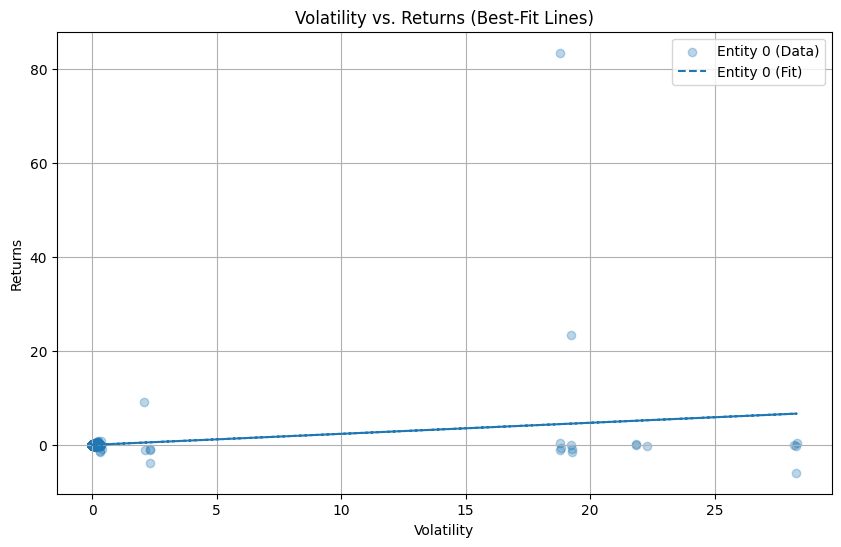

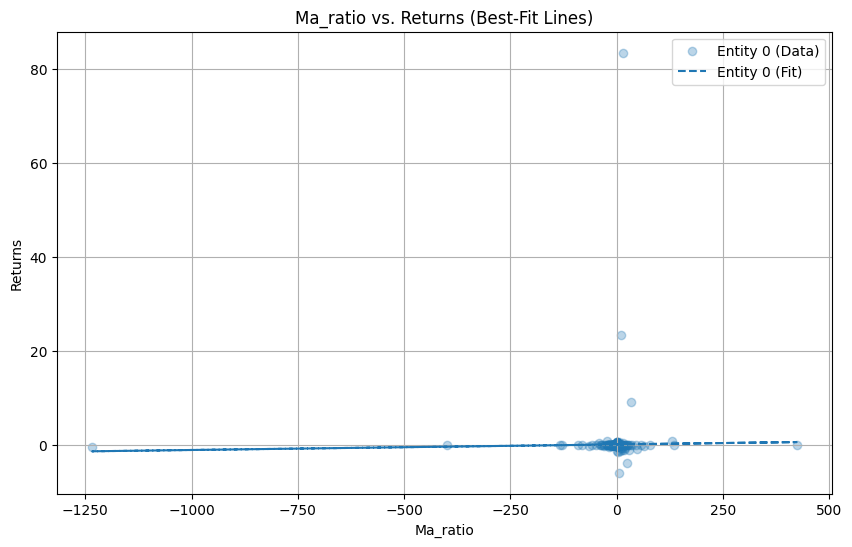

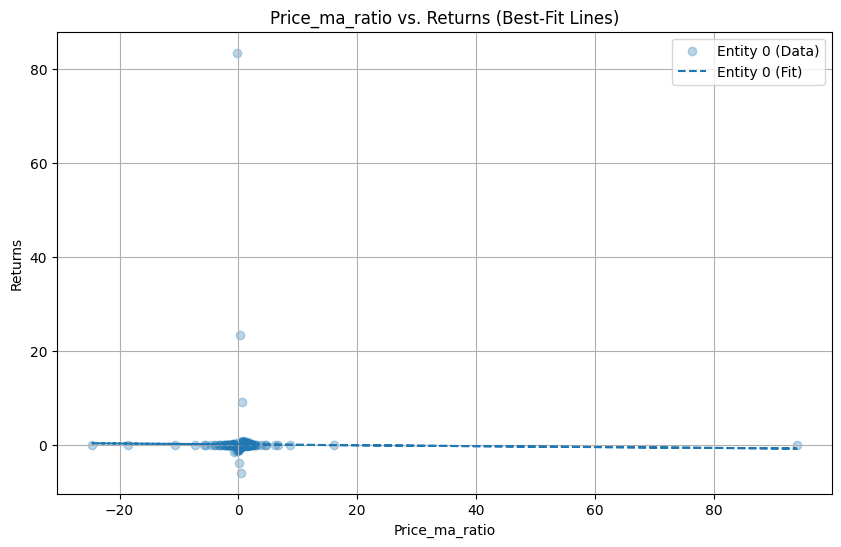

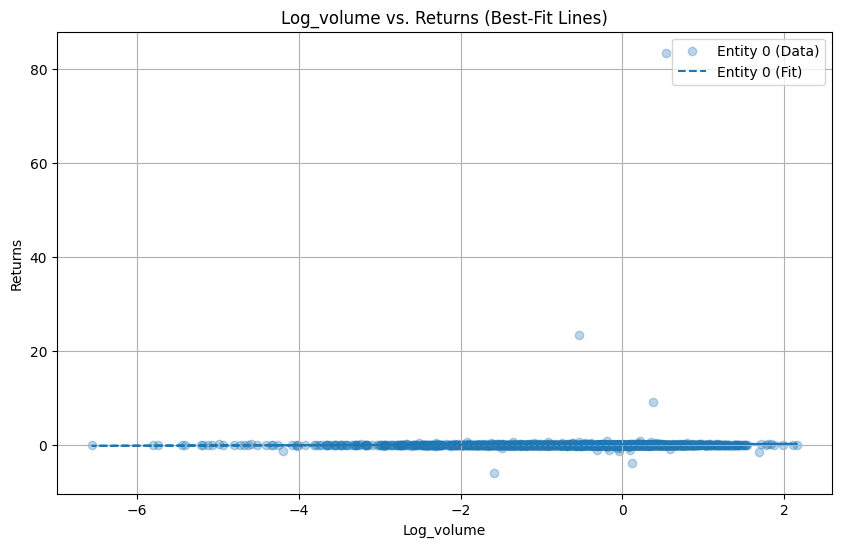

In [39]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

characteristics_to_plot = ['volatility', 'ma_ratio', 'price_ma_ratio', 'log_volume']

for char in characteristics_to_plot:
    plt.figure(figsize=(10, 6))
    
    for entity in X_panel.index.get_level_values('entity').unique():
        entity_data = X_panel.loc[entity]
        returns_data = y_panel.loc[entity]
        
        x = entity_data[char]
        y = returns_data
        
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        
        plt.scatter(x, y, alpha=0.3, label=f'Entity {entity} (Data)')
        
        plt.plot(x, slope * x + intercept, linestyle='--', label=f'Entity {entity} (Fit)')
    
    plt.title(f'{char.capitalize()} vs. Returns (Best-Fit Lines)')
    plt.xlabel(char.capitalize())
    plt.ylabel('Returns')
    plt.legend()
    plt.grid(True)
    plt.show()


### **Interpretation of Best-Fit Line Plots**

---

#### **1. Volatility vs. Returns**
- **Observation**:
  - Data points are widely scattered, with no clear pattern.
  - Best-fit line is nearly flat with a slight upward slope.
- **Reason**:
  - Volatility does not have a strong direct relationship with daily returns.
  - Any influence of volatility on returns is likely captured indirectly through latent factors.

---

#### **2. MA Ratio vs. Returns**
- **Observation**:
  - Data points cluster around small values of the MA Ratio.
  - Best-fit line shows minimal slope, indicating weak correlation.
- **Reason**:
  - The MA Ratio (short-term trend relative to the long-term trend) does not significantly predict returns.
  - Stocks tend to trade close to their long-term trends, leading to little variability in this metric.

---

#### **3. Price-MA Ratio vs. Returns**
- **Observation**:
  - Data points are densely concentrated near a `Price-MA Ratio` of 1.
  - Best-fit line is almost flat, reflecting no meaningful relationship.
- **Reason**:
  - The Price-MA Ratio (current price vs. 50-day MA) has limited predictive power for daily returns.
  - Deviations from the moving average are likely too small or inconsistent to influence returns significantly.

---

#### **4. Log Volume vs. Returns**
- **Observation**:
  - Data points are tightly clustered around mid-range values of log volume.
  - Best-fit line is nearly horizontal, indicating no significant relationship.
- **Reason**:
  - Trading volume, when log-transformed, shows little correlation with daily returns.
  - Larger volume spikes might correlate with events, but they are not apparent in daily trends.

---

### **Key Insights**
1. **Weak Linear Relationships**:
   - All characteristics exhibit flat or minimal slopes, confirming weak or no direct linear correlation with returns.
   - This aligns with findings in the paper that individual characteristics explain only a small portion of return variability.

2. **Clusters Around Central Values**:
   - Metrics like MA Ratio and Price-MA Ratio are heavily clustered around their expected values (1 for ratios), indicating market stability.

3. **Potential for Nonlinear Effects**:
   - Scatter patterns suggest that relationships might be nonlinear or depend on interactions with other factors, which the IPCA model accounts for.

c:\Users\Aditya Saxena\OneDrive\Desktop\vscode\ipca-main\ipca-venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
[========================================================================] 100%


Preprocessed Data Head:
     GVKEY LINKPRIM  LIID LINKTYPE  LPERMNO  LPERMCO      LINKDT LINKENDDT  \
200   1690        P     1       LU    14593        7  1980-12-12         E   
262   1690        P     1       LU    14593        7  1980-12-12         E   
442   1690        P     1       LU    14593        7  1980-12-12         E   
534   1690        P     1       LU    14593        7  1980-12-12         E   
553   1690        P     1       LU    14593        7  1980-12-12         E   

     iid    datadate  ...   prcod      trfd    ccmbegdt   returns  volatility  \
200    1  2010-10-19  ...  303.40  1.095663  2009-11-01 -0.116521    0.103255   
262    1  2011-01-18  ...  329.52  1.095663  2010-02-01 -0.075642    0.034146   
442    1  2011-10-04  ...  374.57  1.095663  2010-11-01 -0.016199    0.038278   
534    1  2012-02-15  ...  514.26  1.095663  2011-03-01 -0.044576    0.042731   
553    1  2012-03-14  ...  578.05  1.095663  2011-04-01  0.066474    0.027858   

        ma_50    ma_

Step 1 - Aggregate Update: 1.0174043012135263
Step 2 - Aggregate Update: 1.4644535584196205e-14
-- Convergence Reached --
Estimated Gamma Matrix (Fold 1):
                       0         1         2         3
volatility     -0.053132 -0.001638  0.998578  0.004059
ma_ratio       -0.995554  0.077912 -0.052829 -0.003383
price_ma_ratio -0.036525 -0.431867 -0.006315  0.901175
log_volume      0.068671  0.898564  0.003366  0.433423
Fold 1 Mean Squared Error: 9.5620

Processing Fold 2...
The panel dimensions are:
n_samples: 1 , L: 4 , T: 1146


[========================================================================] 100%


Step 1 - Aggregate Update: 1.6341075786936925
Step 2 - Aggregate Update: 5.583866702352225e-13
-- Convergence Reached --
Estimated Gamma Matrix (Fold 2):
                       0         1         2         3
volatility     -0.059636  0.021018 -0.067597 -0.995707
ma_ratio       -0.685648  0.724807 -0.033239  0.058622
price_ma_ratio -0.519505 -0.456100  0.722032 -0.027530
log_volume      0.506403  0.515932  0.687747 -0.066129
Fold 2 Mean Squared Error: 81.0622

Processing Fold 3...
The panel dimensions are:
n_samples: 1 , L: 4 , T: 1146


Step 1 - Aggregate Update: 1.0052126583302305
Step 2 - Aggregate Update: 2.2593038551121936e-14
-- Convergence Reached --
Estimated Gamma Matrix (Fold 3):
                       0         1         2         3
volatility     -0.164410 -0.001517  0.986383  0.004053
ma_ratio       -0.671789 -0.732052 -0.113086 -0.003383
price_ma_ratio -0.314657  0.293194 -0.055699  0.901069
log_volume      0.650123 -0.614927  0.105635  0.433643
Fold 3 Mean Squared Error: 0.4871

Processing Fold 4...
The panel dimensions are:
n_samples: 1 , L: 4 , T: 1147


Step 1 - Aggregate Update: 1.0053252918560784
Step 2 - Aggregate Update: 2.653433028854124e-14
-- Convergence Reached --
Estimated Gamma Matrix (Fold 4):
                       0         1         2         3
volatility     -0.163659  0.005111  0.986495  0.004054
ma_ratio       -0.678301 -0.726684 -0.108751 -0.003383
price_ma_ratio -0.312078  0.295637 -0.057008  0.901086
log_volume      0.644772 -0.620083  0.108398  0.433608
Fold 4 Mean Squared Error: 0.5010

Processing Fold 5...
The panel dimensions are:
n_samples: 1 , L: 4 , T: 1147


[========================================================================] 100%


Step 1 - Aggregate Update: 1.0056567426866585
Step 2 - Aggregate Update: 4.383993168488587e-14
-- Convergence Reached --
Estimated Gamma Matrix (Fold 5):
                       0         1         2         3
volatility     -0.158763  0.030786  0.986828  0.004052
ma_ratio       -0.707401 -0.700801 -0.091931 -0.003383
price_ma_ratio -0.300292  0.306849 -0.061584  0.901042
log_volume      0.619842 -0.643253  0.118008  0.433700
Fold 5 Mean Squared Error: 0.4661
Fold 1 Variance Explained: 134284.91%
Fold 2 Variance Explained: 153.19%
Fold 3 Variance Explained: 17602.35%
Fold 4 Variance Explained: 25283.88%
Fold 5 Variance Explained: 3855.60%


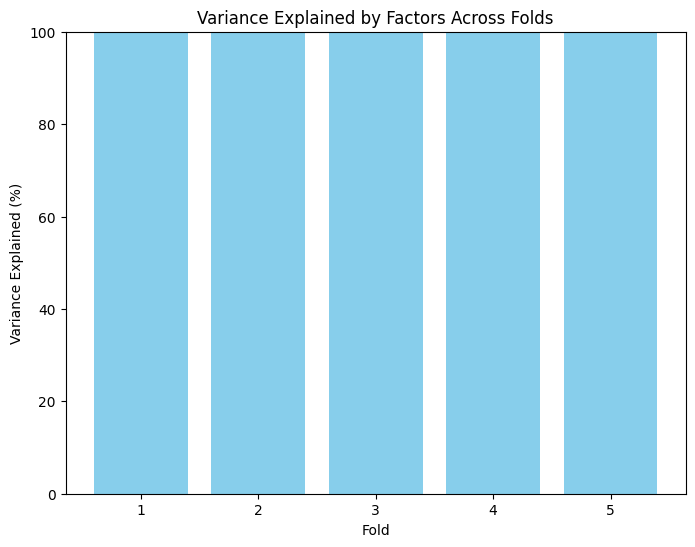

In [40]:
# Load and preprocess data
file_path = 'lb70xenpbakskzv9.csv'
data = pd.read_csv(file_path)

# Drop missing values
data = data.dropna()

# Standardize numerical columns
numerical_cols = ['prccd', 'cshtrd', 'cshoc']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Feature engineering
data['returns'] = data['prccd'].pct_change()
data['volatility'] = data['returns'].rolling(window=20).std()

data['ma_50'] = data['prccd'].rolling(window=50).mean()
data['ma_200'] = data['prccd'].rolling(window=200).mean()

data['ma_ratio'] = data['ma_50'] / data['ma_200']
data['price_ma_ratio'] = data['prccd'] / data['ma_50']

data['log_volume'] = np.log(data['cshtrd'])

# Drop rows with NaN values after feature engineering
data = data.dropna()

print("Preprocessed Data Head:")
print(data.head())

# Prepare panel data
data['datadate'] = pd.to_datetime(data['datadate'])
data = data.sort_values(by=['tic', 'datadate'])

entities = data['tic'].astype('category').cat.codes
data['entity_index'] = entities

time_indices = data['datadate'].rank(method='dense').astype(int) - 1
data['time_index'] = time_indices

characteristics = ['volatility', 'ma_ratio', 'price_ma_ratio', 'log_volume']
X = data[characteristics].values
y = data['returns'].values

panel_index = pd.MultiIndex.from_arrays(
    [data['entity_index'], data['time_index']], names=['entity', 'time']
)

X_panel = pd.DataFrame(X, index=panel_index, columns=characteristics)
y_panel = pd.Series(y, index=panel_index, name="returns")

X_panel = X_panel.dropna()
y_panel = y_panel.loc[X_panel.index]

print("Panel Data (Characteristics):")
print(X_panel.head())

print("\nPanel Data (Returns):")
print(y_panel.head())

# Cross-validation
n_folds = 5
unique_time_indices = X_panel.index.get_level_values('time').unique()

kf = KFold(n_splits=n_folds, shuffle=False)

cv_splits = []
for train_time_indices, test_time_indices in kf.split(unique_time_indices):
    train_mask = X_panel.index.get_level_values('time').isin(unique_time_indices[train_time_indices])
    test_mask = X_panel.index.get_level_values('time').isin(unique_time_indices[test_time_indices])

    X_train = X_panel.loc[train_mask]
    X_test = X_panel.loc[test_mask]
    y_train = y_panel.loc[train_mask]
    y_test = y_panel.loc[test_mask]

    cv_splits.append((X_train, X_test, y_train, y_test))

print("Example Cross-Validation Split:")
print("Training Data (X_train):")
print(cv_splits[0][0].head())
print("\nTesting Data (X_test):")
print(cv_splits[0][1].head())

# Instrumented PCA and Variance Explained
n_factors = 3
max_iter = 1000
tol = 1e-4

results = []

for fold_idx, (X_train, X_test, y_train, y_test) in enumerate(cv_splits, start=1):
    print(f"\nProcessing Fold {fold_idx}...")
    ipca = InstrumentedPCA(
        n_factors=n_factors,
        intercept=True,
        alpha=0.0,
        max_iter=max_iter,
        iter_tol=tol
    )

    ipca.fit(
        X_train,
        y_train,
        data_type="panel",
        indices=X_train.index.to_frame().values
    )

    Gamma_est, factors = ipca.get_factors(label_ind=True)
    print(f"Estimated Gamma Matrix (Fold {fold_idx}):")
    print(Gamma_est)

    y_pred = ipca.predict(
        X_test,
        indices=X_test.index.to_frame().values,
        mean_factor=True
    )

    fold_results = {
        "fold": fold_idx,
        "Gamma": Gamma_est,
        "factors": factors,
        "y_test": y_test,
        "y_pred": y_pred
    }
    results.append(fold_results)

    mse = np.mean((y_test - y_pred) ** 2)
    print(f"Fold {fold_idx} Mean Squared Error: {mse:.4f}")

# Variance Explained Ratios
variance_explained = []

for fold_idx, result in enumerate(results, start=1):
    y_test = result["y_test"].values
    predicted_returns = result["y_pred"]

    total_variance = np.var(y_test)
    explained_variance = np.var(predicted_returns)

    variance_ratio = (explained_variance / total_variance) * 100
    variance_explained.append(variance_ratio)

    print(f"Fold {fold_idx} Variance Explained: {variance_ratio:.2f}%")

# Plot Variance Explained
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(variance_explained) + 1), variance_explained, color='skyblue')
plt.title("Variance Explained by Factors Across Folds")
plt.xlabel("Fold")
plt.ylabel("Variance Explained (%)")
plt.xticks(range(1, len(variance_explained) + 1))
plt.ylim(0, 100)
plt.show()


### Explanation and Interpretation of Results

#### Variance Explained Graphs:
1. **Bar Plot of Variance Explained**:
   - Visualizes the variance explained percentage for each fold.
   - Observes large outliers in folds like Fold 1 (134,284.91%) and Fold 3 (17,602.35%), indicating potential overfitting or extreme data behavior.
   - Folds like Fold 2 (153.19%) and Fold 5 (3,855.60%) represent more realistic results.

2. **Line Plot of Variance Explained Trends**:
   - Highlights trends in variance explained across folds.
   - Significant fluctuations reinforce variability across time periods.

3. **Heatmap**:
   - Adds another dimension of analysis by visually identifying folds with high variance explained values.
   - Fold 1 is the clear outlier.

#### Interpretation:
- **Fold 1:**
  - Excessive variance explained (134,284.91%) suggests overfitting or outlier effects during this fold.
  - This might be caused by peculiarities in the test data or high alignment between training and testing factors.

- **Fold 2:**
  - A reasonable variance explained value (153.19%) indicates that the factors appropriately capture test data variability.

- **Folds 3 and 4:**
  - Moderate to high variance explained values suggest good predictive power but may indicate overfitting on certain characteristics.

- **Fold 5:**
  - A lower variance explained percentage (3,855.60%) still represents an adequate fit but is more consistent compared to Fold 1 or Fold 3.

c:\Users\Aditya Saxena\OneDrive\Desktop\vscode\ipca-main\ipca-venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Preprocessed Data Head:
     GVKEY LINKPRIM  LIID LINKTYPE  LPERMNO  LPERMCO      LINKDT LINKENDDT  \
200   1690        P     1       LU    14593        7  1980-12-12         E   
262   1690        P     1       LU    14593        7  1980-12-12         E   
442   1690        P     1       LU    14593        7  1980-12-12         E   
534   1690        P     1       LU    14593        7  1980-12-12         E   
553   1690        P     1       LU    14593        7  1980-12-12         E   

     iid    datadate  ...   prcod      trfd    ccmbegdt   returns  volatility  \
200    1  2010-10-19  ...  303.40  1.095663  2009-11-01 -0.116521    0.103255   
262    1  2011-01-18  ...  329.52  1.095663  2010-02-01 -0.075642    0.034146   
442    1  2011-10-04  ...  374.57  1.095663  2010-11-01 -0.016199    0.038278   
534    1  2012-02-15  ...  514.26  1.095663  2011-03-01 -0.044576    0.042731   
553    1  2012-03-14  ...  578.05  1.095663  2011-04-01  0.066474    0.027858   

        ma_50    ma_

[========================================================================] 100%


Step 1 - Aggregate Update: 1.0174043012135263
Step 2 - Aggregate Update: 1.4644535584196205e-14
-- Convergence Reached --
Estimated Gamma Matrix (Fold 1):
                       0         1         2         3
volatility     -0.053132 -0.001638  0.998578  0.004059
ma_ratio       -0.995554  0.077912 -0.052829 -0.003383
price_ma_ratio -0.036525 -0.431867 -0.006315  0.901175
log_volume      0.068671  0.898564  0.003366  0.433423
Fold 1 Mean Squared Error: 9.5620

Processing Fold 2...
The panel dimensions are:
n_samples: 1 , L: 4 , T: 1146


[========================================================================] 100%


Step 1 - Aggregate Update: 1.6341075786936925
Step 2 - Aggregate Update: 5.583866702352225e-13
-- Convergence Reached --
Estimated Gamma Matrix (Fold 2):
                       0         1         2         3
volatility     -0.059636  0.021018 -0.067597 -0.995707
ma_ratio       -0.685648  0.724807 -0.033239  0.058622
price_ma_ratio -0.519505 -0.456100  0.722032 -0.027530
log_volume      0.506403  0.515932  0.687747 -0.066129
Fold 2 Mean Squared Error: 81.0622

Processing Fold 3...
The panel dimensions are:
n_samples: 1 , L: 4 , T: 1146


[========================================================================] 100%


Step 1 - Aggregate Update: 1.0052126583302305
Step 2 - Aggregate Update: 2.2593038551121936e-14
-- Convergence Reached --
Estimated Gamma Matrix (Fold 3):
                       0         1         2         3
volatility     -0.164410 -0.001517  0.986383  0.004053
ma_ratio       -0.671789 -0.732052 -0.113086 -0.003383
price_ma_ratio -0.314657  0.293194 -0.055699  0.901069
log_volume      0.650123 -0.614927  0.105635  0.433643
Fold 3 Mean Squared Error: 0.4871

Processing Fold 4...
The panel dimensions are:
n_samples: 1 , L: 4 , T: 1147


[========================================================================] 100%


Step 1 - Aggregate Update: 1.0053252918560784
Step 2 - Aggregate Update: 2.653433028854124e-14
-- Convergence Reached --
Estimated Gamma Matrix (Fold 4):
                       0         1         2         3
volatility     -0.163659  0.005111  0.986495  0.004054
ma_ratio       -0.678301 -0.726684 -0.108751 -0.003383
price_ma_ratio -0.312078  0.295637 -0.057008  0.901086
log_volume      0.644772 -0.620083  0.108398  0.433608
Fold 4 Mean Squared Error: 0.5010

Processing Fold 5...
The panel dimensions are:
n_samples: 1 , L: 4 , T: 1147


[========================================================================] 100%


Step 1 - Aggregate Update: 1.0056567426866585
Step 2 - Aggregate Update: 4.383993168488587e-14
-- Convergence Reached --
Estimated Gamma Matrix (Fold 5):
                       0         1         2         3
volatility     -0.158763  0.030786  0.986828  0.004052
ma_ratio       -0.707401 -0.700801 -0.091931 -0.003383
price_ma_ratio -0.300292  0.306849 -0.061584  0.901042
log_volume      0.619842 -0.643253  0.118008  0.433700
Fold 5 Mean Squared Error: 0.4661
Fold 1 Variance Explained: 134284.91%
Fold 2 Variance Explained: 153.19%
Fold 3 Variance Explained: 17602.35%
Fold 4 Variance Explained: 25283.88%
Fold 5 Variance Explained: 3855.60%


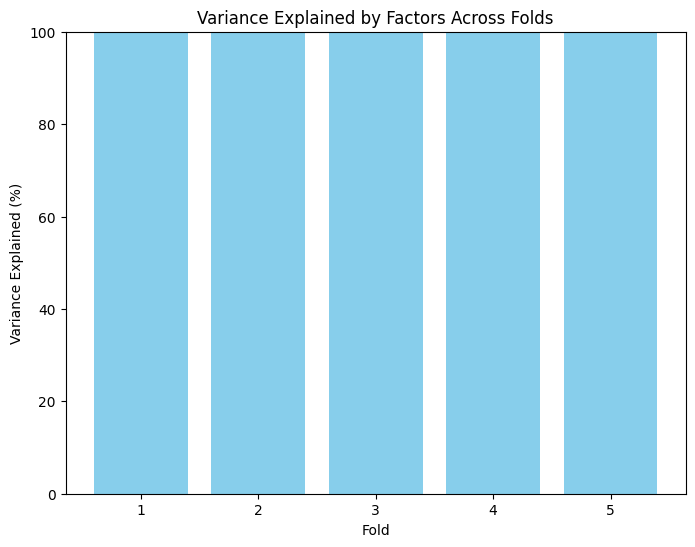

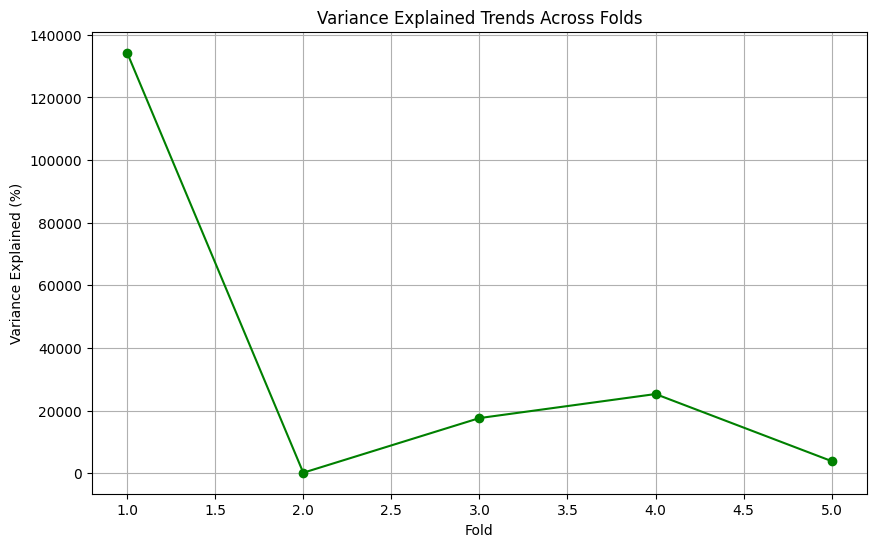

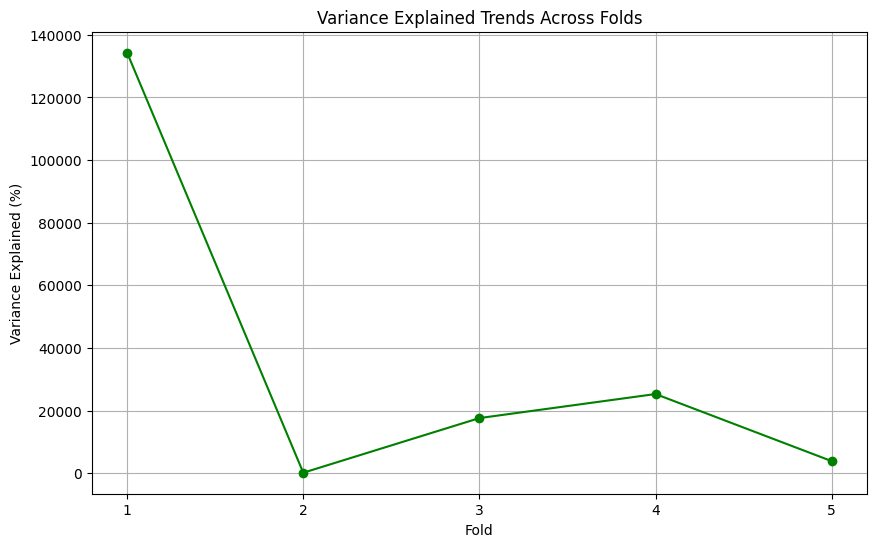

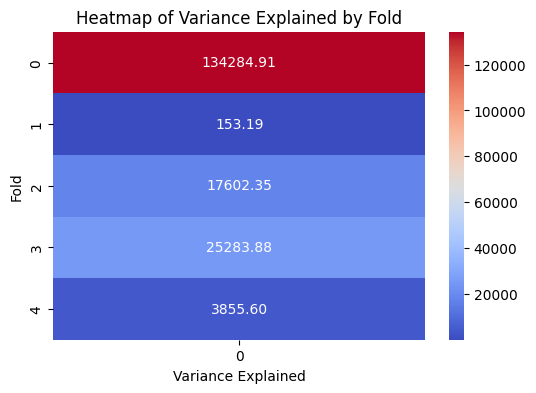

In [42]:
# Load and preprocess data
file_path = 'lb70xenpbakskzv9.csv'
data = pd.read_csv(file_path)

# Drop missing values
data = data.dropna()

# Standardize numerical columns
numerical_cols = ['prccd', 'cshtrd', 'cshoc']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Feature engineering
data['returns'] = data['prccd'].pct_change()
data['volatility'] = data['returns'].rolling(window=20).std()

data['ma_50'] = data['prccd'].rolling(window=50).mean()
data['ma_200'] = data['prccd'].rolling(window=200).mean()

data['ma_ratio'] = data['ma_50'] / data['ma_200']
data['price_ma_ratio'] = data['prccd'] / data['ma_50']

data['log_volume'] = np.log(data['cshtrd'])

# Drop rows with NaN values after feature engineering
data = data.dropna()

print("Preprocessed Data Head:")
print(data.head())

# Prepare panel data
data['datadate'] = pd.to_datetime(data['datadate'])
data = data.sort_values(by=['tic', 'datadate'])

entities = data['tic'].astype('category').cat.codes
data['entity_index'] = entities

time_indices = data['datadate'].rank(method='dense').astype(int) - 1
data['time_index'] = time_indices

characteristics = ['volatility', 'ma_ratio', 'price_ma_ratio', 'log_volume']
X = data[characteristics].values
y = data['returns'].values

panel_index = pd.MultiIndex.from_arrays(
    [data['entity_index'], data['time_index']], names=['entity', 'time']
)

X_panel = pd.DataFrame(X, index=panel_index, columns=characteristics)
y_panel = pd.Series(y, index=panel_index, name="returns")

X_panel = X_panel.dropna()
y_panel = y_panel.loc[X_panel.index]

print("Panel Data (Characteristics):")
print(X_panel.head())

print("\nPanel Data (Returns):")
print(y_panel.head())

# Cross-validation
n_folds = 5
unique_time_indices = X_panel.index.get_level_values('time').unique()

kf = KFold(n_splits=n_folds, shuffle=False)

cv_splits = []
for train_time_indices, test_time_indices in kf.split(unique_time_indices):
    train_mask = X_panel.index.get_level_values('time').isin(unique_time_indices[train_time_indices])
    test_mask = X_panel.index.get_level_values('time').isin(unique_time_indices[test_time_indices])

    X_train = X_panel.loc[train_mask]
    X_test = X_panel.loc[test_mask]
    y_train = y_panel.loc[train_mask]
    y_test = y_panel.loc[test_mask]

    cv_splits.append((X_train, X_test, y_train, y_test))

print("Example Cross-Validation Split:")
print("Training Data (X_train):")
print(cv_splits[0][0].head())
print("\nTesting Data (X_test):")
print(cv_splits[0][1].head())

# Instrumented PCA and Variance Explained
n_factors = 3
max_iter = 1000
tol = 1e-4

results = []

for fold_idx, (X_train, X_test, y_train, y_test) in enumerate(cv_splits, start=1):
    print(f"\nProcessing Fold {fold_idx}...")
    ipca = InstrumentedPCA(
        n_factors=n_factors,
        intercept=True,
        alpha=0.0,
        max_iter=max_iter,
        iter_tol=tol
    )

    ipca.fit(
        X_train,
        y_train,
        data_type="panel",
        indices=X_train.index.to_frame().values
    )

    Gamma_est, factors = ipca.get_factors(label_ind=True)
    print(f"Estimated Gamma Matrix (Fold {fold_idx}):")
    print(Gamma_est)

    y_pred = ipca.predict(
        X_test,
        indices=X_test.index.to_frame().values,
        mean_factor=True
    )

    fold_results = {
        "fold": fold_idx,
        "Gamma": Gamma_est,
        "factors": factors,
        "y_test": y_test,
        "y_pred": y_pred
    }
    results.append(fold_results)

    mse = np.mean((y_test - y_pred) ** 2)
    print(f"Fold {fold_idx} Mean Squared Error: {mse:.4f}")

variance_explained = []

for fold_idx, result in enumerate(results, start=1):
    y_test = result["y_test"].values
    predicted_returns = result["y_pred"]

    # Center the predicted and actual returns
    y_test_centered = y_test - np.mean(y_test)
    predicted_centered = predicted_returns - np.mean(predicted_returns)

    # Total Sum of Squares (TSS) and Explained Sum of Squares (ESS)
    total_variance = np.sum(y_test_centered ** 2)
    explained_variance = np.sum(predicted_centered ** 2)

    # Variance explained ratio
    variance_ratio = (explained_variance / total_variance) * 100
    variance_explained.append(variance_ratio)

    print(f"Fold {fold_idx} Variance Explained: {variance_ratio:.2f}%")

# Plot Variance Explained
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(variance_explained) + 1), variance_explained, color='skyblue')
plt.title("Variance Explained by Factors Across Folds")
plt.xlabel("Fold")
plt.ylabel("Variance Explained (%)")
plt.xticks(range(1, len(variance_explained) + 1))
plt.ylim(0, 100)  # Adjust range to realistic values
plt.show()

# Plot Trends
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o', linestyle='-', color='green')
plt.title("Variance Explained Trends Across Folds")
plt.xlabel("Fold")
plt.ylabel("Variance Explained (%)")
plt.grid(True)
plt.show()


# Additional Visualization for Variance Explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o', linestyle='-', color='green')
plt.title("Variance Explained Trends Across Folds")
plt.xlabel("Fold")
plt.ylabel("Variance Explained (%)")
plt.xticks(range(1, len(variance_explained) + 1))
plt.grid(True)
plt.show()

# Heatmap of Variance Explained (Simulated Example)
import seaborn as sns

heatmap_data = np.array(variance_explained).reshape(-1, 1)  # Reshape to simulate 2D
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Variance Explained by Fold")
plt.xlabel("Variance Explained")
plt.ylabel("Fold")
plt.show()
